In [1]:
!pip install --quiet wbgapi 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy import stats

import wbgapi as wb

In [3]:
import requests

username = "yohanesmiracle"
repo_name = "World_Bank_Data_projet_Yohanes-sourcefiles"
file_path = "API_TGO_DS2_fr_csv_v2_6014417.csv"


response = requests.get(f"https://api.github.com/repos/{username}/{repo_name}/contents/{file_path}")

content = response.json()["content"]

import base64
decoded_content = base64.b64decode(content)
print(decoded_content)

b'"Country Name","Country Code","Indicator Name","Indicator Code","1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971","1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020","2021","2022",\r\n"Togo","TGO","Internally displaced persons, total displaced by conflict and violence (number of people)","VC.IDP.TOCV","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","10000","10000","10000","10000","10000","10000","3000","1500","","","","","","2300",\r\n"Togo","TGO","Voice and Accountability: Standard Error","VA.STD.ERR","","","","","","","","","","","","","","","","","","","","","","",

## c'est ici que je mets les indicateurs que je pense que je vais utiliser

1. Analyse de Corrélation entre Indicateurs:

PIB par habitant. NY.GDP.PCAP.PP.KD

Taux d’alphabétisation, total des adultes (% des personnes âgées de 15 ans et plus). SE.ADT.LITR.ZS
Taux d’alphabétisation des jeunes hommes (% d’hommes âgés de 15 à 24 ans). SE.ADT.1524.LT.MA.ZS
Taux d’alphabétisation des femmes adultes (% de femmes âgées de 15 ans et plus). SE.ADT.LITR.FE.ZS
Taux d’alphabétisation des jeunes femmes (% de femmes âgées de 15 à 24 ans). SE.ADT.1524.LT.FE.ZS
Taux d’alphabétisation des jeunes (% des jeunes âgés de 15 à 24 ans). SE.ADT.1524.LT.ZS
Taux d’alphabétisation des hommes adultes (% d’hommes âgés de 15 ans et plus). SE.ADT.LITR.MA.ZS
Taux de mortalité infantile, moins de 5 ans (pour 1 000). SH.DYN.MORT
Taux de mortalité infantile (pour 1 000 naissances vivantes). SP.DYN.IMRT.IN
Taux de mortalité infantile, garçons (pour 1 000 naissances vivantes). SP.DYN.IMRT.MA.IN
Taux de mortalité infantile, filles (pour 1 000 naissances vivantes). SP.DYN.IMRT.FE.IN
Taux de mortalité infantile, moins de 5 ans, filles (pour 1000 naissances vivantes). SH.DYN.MORT.FE
Taux de mortalité infantile, moins de 5 ans, garçons (pour 1 000). SH.DYN.MORT.MA
Taux de mortalité néonatale (pour 1 000 naissances vivantes). SH.DYN.NMRT

Espérance de vie à la naissance, total (années). SP.DYN.LE00.IN
Espérance de vie à la naissance, femmes (années). SP.DYN.LE00.FE.IN
Espérance de vie à la naissance, hommes (années). SP.DYN.LE00.MA.IN

Chercheurs en recherche et développement (pour un million de personnes). SP.POP.SCIE.RD.P6
Dépenses en recherche et développement (% du PIB). GB.XPD.RSDV.GD.ZS


Ressources renouvelables d’eau douce intérieures, total (milliards de mètres cubes). ER.H2O.INTR.K3
Investissements dans l’eau et l’assainissement avec une participation privée ($ US courants). IE.PPI.WATR.CD
Retraits annuels d’eau douce, total (% des ressources internes). ER.H2O.FWTL.ZS
Retraits annuels d’eau douce pour usage domestique (% des retraits totaux d’eau douce). ER.H2O.FWDM.ZS
Retraits annuels d’eau douce, total (milliards de mètres cubes). ER.H2O.FWTL.K3
Retraits annuels d’eau douce pour l’agriculture (% des retraits totaux d’eau douce). ER.H2O.FWAG.ZS




---


<img decoding="async" src="https://salonimmigration.com/wp-content/uploads/2021/07/Universite_Teluq_Logo_255x158-1.png" alt="Logo Universite TELUQ" width="255" height="158" class="size-full wp-image-1922 alignleft" />



---




# c'est ici que tout mon code commence



In [4]:
import wbgapi as wb
import requests
import plotly.express as px
# wb.source.info()
index_togo = list(wb.region.members('AFR')).index('TGO')
index_togo
countries = []

for country in wb.region.members('AFR'):
    if country in ('TGO'):
        countries.append(country)
countries = set(countries)

gdp_indicator = wb.data.DataFrame('NY.GNP.PCAP.PP.KD', countries, range(1990, 2021))  # PIB par habitant

gdp_indicator

YR1990      YR1991       YR1992       YR1993       YR1994  \
economy                                                                   
TGO      1770.551265  1706.92941  1596.078634  1360.947396  1519.183636   

              YR1995       YR1996       YR1997      YR1998       YR1999  ...  \
economy                                                                  ...   
TGO      1591.263266  1687.544386  1870.257074  1778.35937  1754.589802  ...   

              YR2011       YR2012       YR2013       YR2014       YR2015  \
economy                                                                    
TGO      1759.387276  1749.779178  1810.415963  1870.217408  1956.667097   

              YR2016       YR2017       YR2018       YR2019       YR2020  
economy                                                                   
TGO      1960.849843  1972.566518  2013.847742  2060.479039  2070.396557  

[1 rows x 31 columns]

<Axes: xlabel='economy'>

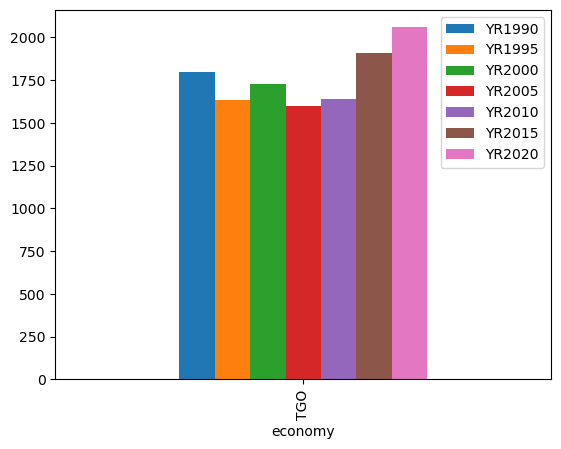

In [5]:
wb.data.DataFrame(['NY.GDP.PCAP.PP.KD'],
                     countries,
                      time=range(1990,2021,5)).plot.bar()

In [6]:
life_expectancy_indicator = wb.data.DataFrame('SP.DYN.LE00.IN', countries, range(1990, 2021))  #Espérance de vie à la naissance, total (années)
life_expectancy_indicator

YR1990  YR1991  YR1992  YR1993  YR1994  YR1995  YR1996  YR1997  \
economy                                                                   
TGO       54.37  54.268  54.299  54.195  54.037  54.037  54.098  54.192   

         YR1998  YR1999  ...  YR2011  YR2012  YR2013  YR2014  YR2015  YR2016  \
economy                  ...                                                   
TGO      54.199  54.538  ...  57.925  58.073  58.684  58.853  59.396   59.55   

         YR2017  YR2018  YR2019  YR2020  
economy                                  
TGO      60.154  60.244  60.901  61.035  

[1 rows x 31 columns]

<Axes: xlabel='economy'>

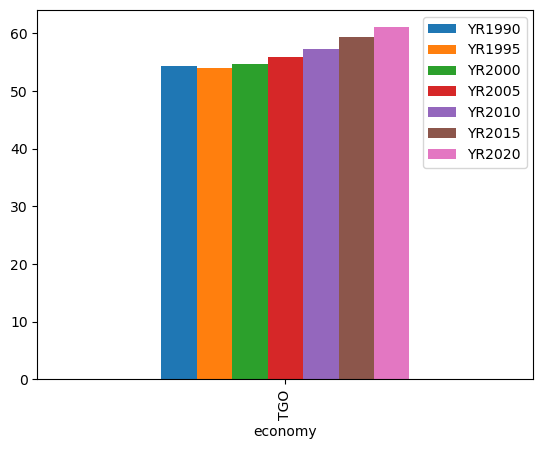

In [7]:
wb.data.DataFrame(['SP.DYN.LE00.IN'],
                     countries,
                      time=range(1990,2021,5)).plot.bar() 

In [8]:
co2_emissions_indicator = wb.data.DataFrame('EN.ATM.CO2E.PC', countries, range(1990, 2021), numericTimeKeys=True,)  #Émissions de CO2 (tonnes métriques par habitant)
co2_emissions_indicator

1990      1991      1992      1993      1994      1995      1996  \
economy                                                                         
TGO      0.252222  0.231942  0.181676  0.155233  0.221594  0.228388  0.305136   

             1997      1998      1999  ...      2011      2012      2013  \
economy                                ...                                 
TGO      0.166291  0.253707  0.350908  ...  0.372755  0.322783  0.246122   

            2014      2015      2016      2017     2018      2019      2020  
economy                                                                      
TGO      0.21795  0.244285  0.300939  0.257068  0.27215  0.296284  0.286062  

[1 rows x 31 columns]

<Axes: xlabel='economy'>

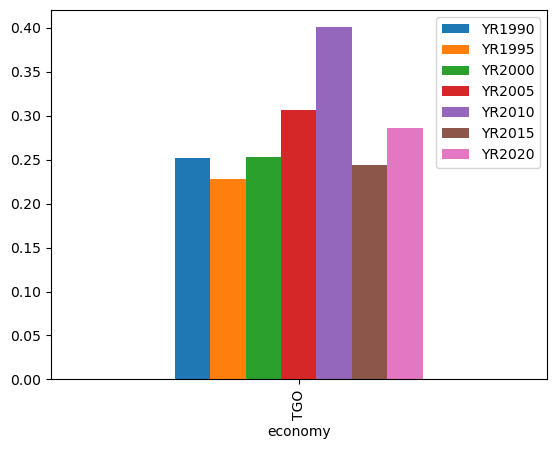

In [9]:
wb.data.DataFrame(['EN.ATM.CO2E.PC'],
                     countries,
                      time=range(1990,2021,5)).plot.bar()

In [10]:
list_values_gdp = []

gdp=wb.data.DataFrame('NY.GDP.PCAP.PP.KD', 
                    economy = countries,
                      
                    time = range(1990, 2021), numericTimeKeys = True,
                    labels = True).set_index('Country')

for (column_name, column_data) in gdp.items():

    list_values_gdp.append(column_data.values)
    
list_values_gdp    

[array([1800.32017413]),
 array([1736.52352747]),
 array([1620.2926265]),
 array([1385.08246528]),
 array([1587.06768079]),
 array([1636.81523647]),
 array([1714.80513216]),
 array([1898.7117835]),
 array([1801.78639414]),
 array([1793.53263883]),
 array([1729.70175791]),
 array([1697.37871238]),
 array([1716.91346228]),
 array([1785.15463371]),
 array([1721.87620122]),
 array([1599.45858532]),
 array([1596.38773547]),
 array([1532.42006065]),
 array([1549.44041224]),
 array([1588.96477697]),
 array([1637.65195835]),
 array([1687.61106815]),
 array([1747.88421246]),
 array([1802.93897953]),
 array([1856.90481374]),
 array([1910.00004506]),
 array([1941.62759622]),
 array([1970.21483978]),
 array([2014.94172914]),
 array([2063.75873637]),
 array([2058.56505955])]

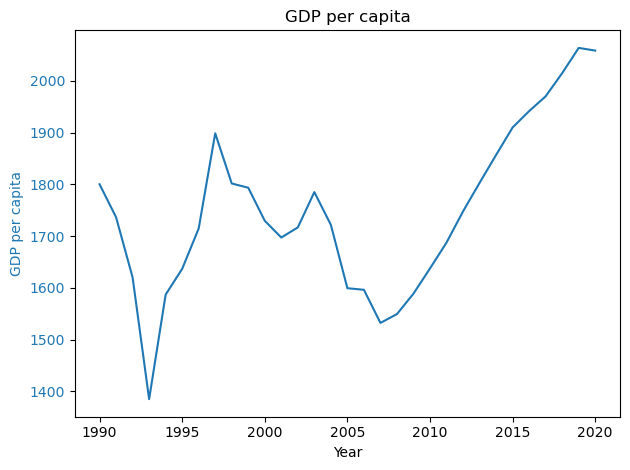

In [11]:
import matplotlib.pyplot as plt
import numpy as np

years=np.arange(1990, 2021)
fig, ax1=plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('GDP per capita', color='tab:blue')
ax1.plot(years, list_values_gdp, color='tab:blue', label='GDP per cap')
ax1.tick_params(axis='y', labelcolor='tab:blue')

plt.title('GDP per capita')
fig.tight_layout()
plt.show()

In [12]:
list_values_life_expectancy = []

life_expectancy=wb.data.DataFrame('SP.DYN.LE00.IN', 
                    economy = countries, 
                    time = range(1990, 2021), numericTimeKeys = True,
                    labels = True).set_index('Country')


for (column_name, column_data) in life_expectancy.items():

    list_values_life_expectancy.append(column_data.values)
    
list_values_life_expectancy

[array([54.37]),
 array([54.268]),
 array([54.299]),
 array([54.195]),
 array([54.037]),
 array([54.037]),
 array([54.098]),
 array([54.192]),
 array([54.199]),
 array([54.538]),
 array([54.742]),
 array([54.86]),
 array([55.311]),
 array([55.639]),
 array([55.569]),
 array([55.962]),
 array([56.222]),
 array([56.511]),
 array([56.695]),
 array([57.011]),
 array([57.304]),
 array([57.925]),
 array([58.073]),
 array([58.684]),
 array([58.853]),
 array([59.396]),
 array([59.55]),
 array([60.154]),
 array([60.244]),
 array([60.901]),
 array([61.035])]

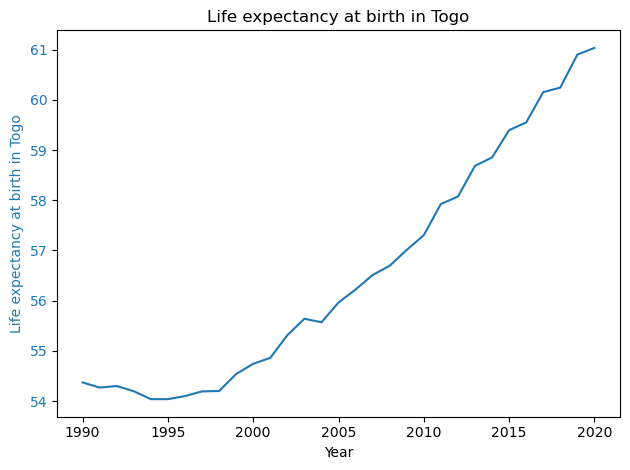

In [13]:
import matplotlib.pyplot as plt
import numpy as np

years=np.arange(1990, 2021)
fig, ax1=plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('Life expectancy at birth in Togo', color='tab:blue')
ax1.plot(years, list_values_life_expectancy, color='tab:blue', label='Life expectancy at birth in Togo')
ax1.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Life expectancy at birth in Togo')
fig.tight_layout()
plt.show()

In [14]:
list_values_CO2_emissions = []

CO2_emissions=wb.data.DataFrame('EN.ATM.CO2E.PC', 
                    economy = countries, 
                    time = range(1990, 2021), numericTimeKeys = True,
                    labels = True).set_index('Country')


for (column_name, column_data) in CO2_emissions.items():

    list_values_CO2_emissions.append(column_data.values)

list_values_CO2_emissions


[array([0.25222223]),
 array([0.23194239]),
 array([0.18167565]),
 array([0.15523275]),
 array([0.22159442]),
 array([0.22838764]),
 array([0.30513624]),
 array([0.16629106]),
 array([0.25370657]),
 array([0.35090811]),
 array([0.2533928]),
 array([0.22896063]),
 array([0.2545092]),
 array([0.33827701]),
 array([0.31952028]),
 array([0.30606151]),
 array([0.26720052]),
 array([0.24864668]),
 array([0.25211805]),
 array([0.44145429]),
 array([0.40020664]),
 array([0.37275482]),
 array([0.322783]),
 array([0.2461221]),
 array([0.21794958]),
 array([0.2442853]),
 array([0.30093897]),
 array([0.25706771]),
 array([0.27214954]),
 array([0.29628438]),
 array([0.28606184])]

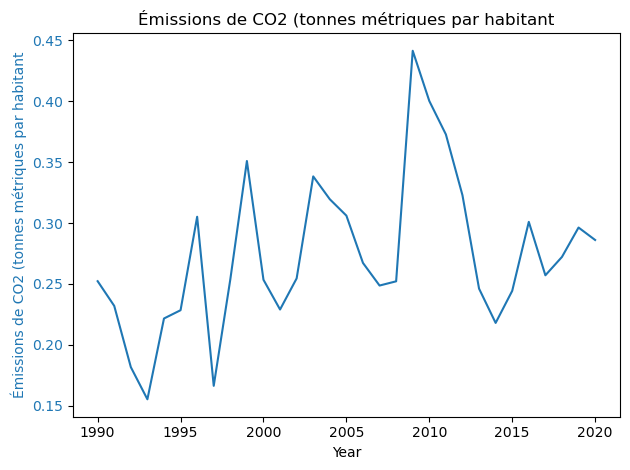

In [15]:
import matplotlib.pyplot as plt
import numpy as np

years=np.arange(1990, 2021)
fig, ax1=plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('Émissions de CO2 (tonnes métriques par habitant', color='tab:blue')
ax1.plot(years, list_values_CO2_emissions, color='tab:blue', label='Émissions de CO2 (tonnes métriques par habitant')
ax1.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Émissions de CO2 (tonnes métriques par habitant')
fig.tight_layout()
plt.show()

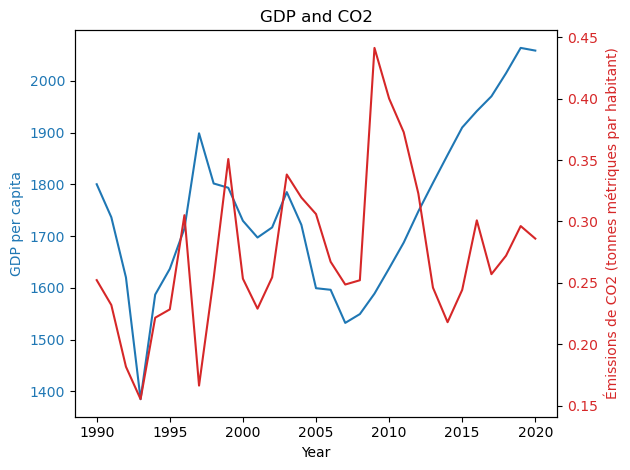

In [16]:
import matplotlib.pyplot as plt
import numpy as np

years=np.arange(1990, 2021)
fig, ax1=plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('GDP per capita', color='tab:blue')
ax1.plot(years, list_values_gdp, color='tab:blue', label='GDP per cap')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2=ax1.twinx()
ax2.set_ylabel('Émissions de CO2 (tonnes métriques par habitant)', color='tab:red')
ax2.plot(years, list_values_CO2_emissions, color='tab:red', label='CO2 emission')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('GDP and CO2')
fig.tight_layout()
plt.show()

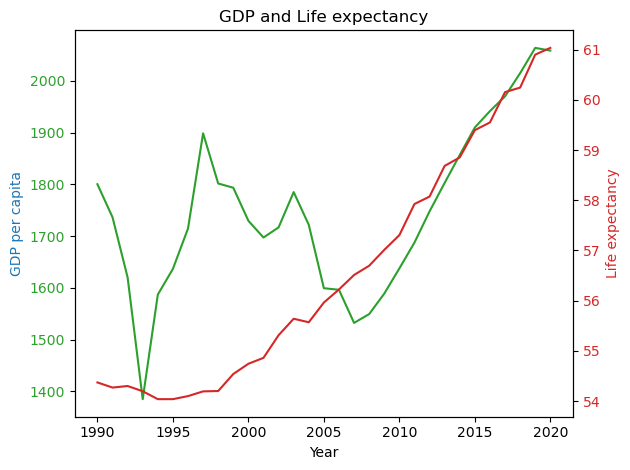

In [17]:
import matplotlib.pyplot as plt
import numpy as np

years=np.arange(1990, 2021)
fig, ax1=plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('GDP per capita', color='tab:blue')
ax1.plot(years, list_values_gdp, color='tab:green', label='GDP per cap')
ax1.tick_params(axis='y', labelcolor='tab:green')

ax2=ax1.twinx()
ax2.set_ylabel('Life expectancy', color='tab:red')
ax2.plot(years, list_values_life_expectancy, color='tab:red', label='Life expectancy')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('GDP and Life expectancy')
fig.tight_layout()
plt.show()

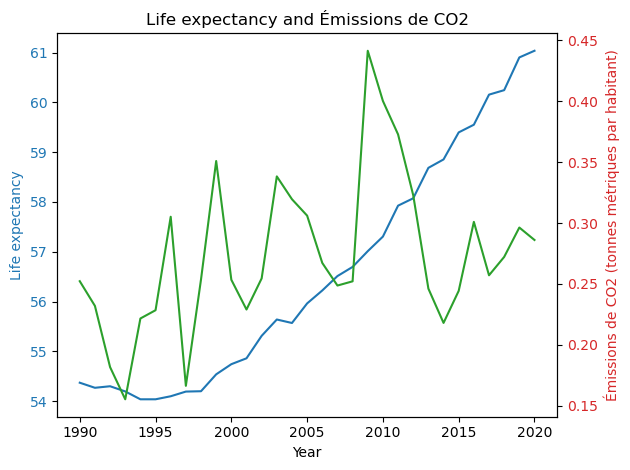

In [18]:
import matplotlib.pyplot as plt
import numpy as np

years=np.arange(1990, 2021)
fig, ax1=plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('Life expectancy', color='tab:blue')
ax1.plot(years, list_values_life_expectancy, color='tab:blue', label='GDP per cap')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2=ax1.twinx()
ax2.set_ylabel('Émissions de CO2 (tonnes métriques par habitant)', color='tab:red')
ax2.plot(years, list_values_CO2_emissions, color='tab:green', label='Émissions de CO2')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Life expectancy and Émissions de CO2')
fig.tight_layout()
plt.show()

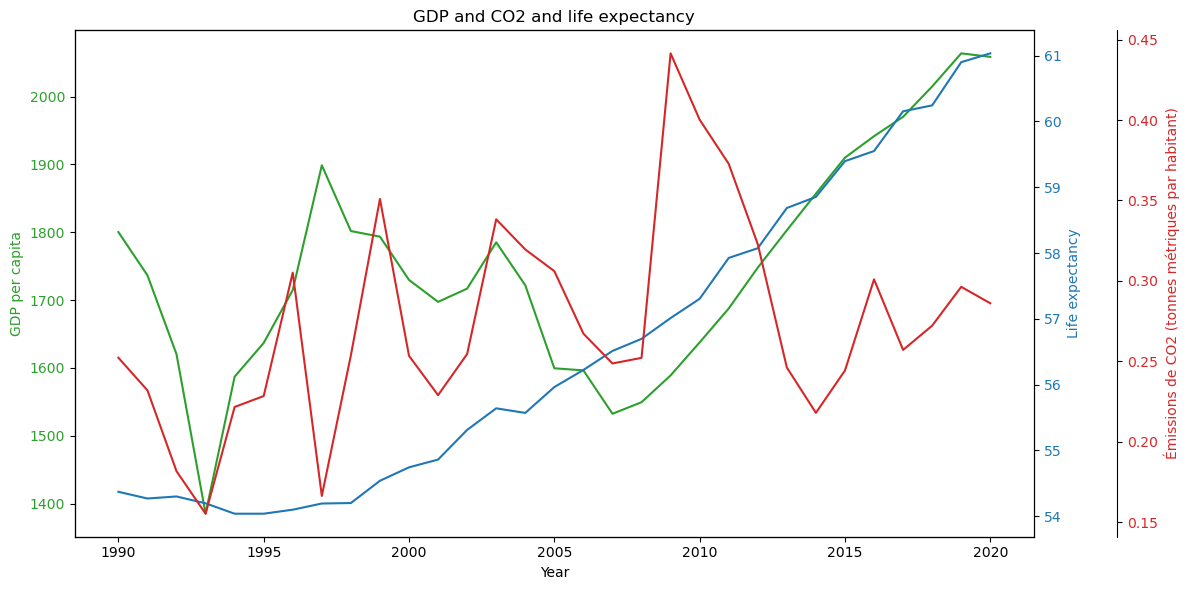

In [19]:
import matplotlib.pyplot as plt
import numpy as np

years=np.arange(1990, 2021)
fig, ax1=plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Year')
ax1.set_ylabel('GDP per capita', color='tab:green')
ax1.plot(years, list_values_gdp, color='tab:green', label='GDP per cap')
ax1.tick_params(axis='y', labelcolor='tab:green')

ax2=ax1.twinx()
ax2.set_xlabel('Year')
ax2.set_ylabel('Life expectancy', color='tab:blue')
ax2.plot(years, list_values_life_expectancy, color='tab:blue', label='GDP per cap')
ax2.tick_params(axis='y', labelcolor='tab:blue')

ax3=ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
ax3.set_ylabel('Émissions de CO2 (tonnes métriques par habitant)', color='tab:red')
ax3.plot(years, list_values_CO2_emissions, color='tab:red', label='Émissions de CO2')
ax3.tick_params(axis='y', labelcolor='tab:red')

plt.title('GDP and CO2 and life expectancy')
fig.tight_layout()
plt.show()

In [20]:
#QUESTION 2 : Analyse Temporelle des Tendances Économiques

# PIB par habitant, ($ PPA internationaux courants). NY.GDP.PCAP.PP.CD
# Inflation, prix à la consommation (% annuel). FP.CPI.TOTL.ZG
# Chômage (% de la population active) (estimation nationale). SL.UEM.TOTL.NE.ZS
# Consommation moyenne ou revenu moyen par habitant, population totale (en USD par jour, PPA de 2011). SI.SPR.PCAP

In [21]:
PIB_indicator = wb.data.DataFrame('NY.GDP.PCAP.PP.CD', countries, range(1990, 2021))  # PIB par habitant, ($ PPA internationaux courants)

PIB_indicator

YR1990       YR1991       YR1992      YR1993       YR1994  \
economy                                                                   
TGO      1145.240353  1142.014173  1089.859139  953.732736  1116.150868   

              YR1995       YR1996       YR1997       YR1998       YR1999  ...  \
economy                                                                   ...   
TGO      1175.275469  1253.818456  1412.225991  1355.218375  1368.020987  ...   

             YR2011       YR2012      YR2013       YR2014      YR2015  \
economy                                                                 
TGO      1656.16195  1677.296286  1739.13225  1818.041895  1884.96673   

              YR2016      YR2017       YR2018       YR2019       YR2020  
economy                                                                  
TGO      1928.141125  1970.21484  2063.382109  2151.285143  2173.872929  

[1 rows x 31 columns]

<Axes: xlabel='economy'>

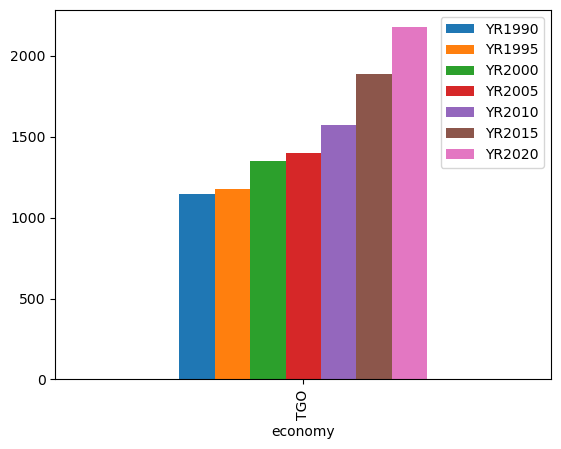

In [22]:
wb.data.DataFrame(['NY.GDP.PCAP.PP.CD'],
                     countries,
                      time=range(1990,2021,5)).plot.bar()

In [23]:
Inflation_indicator = wb.data.DataFrame('FP.CPI.TOTL.ZG', countries, range(1990, 2021))  # Inflation, prix à la consommation (% annuel). 

Inflation_indicator 

YR1990    YR1991    YR1992    YR1993     YR1994     YR1995  YR1996  \
economy                                                                         
TGO      1.015342  0.387082  1.393787 -1.006882  39.162767  16.433503  4.6875   

           YR1997    YR1998    YR1999  ...    YR2011    YR2012    YR2013  \
economy                                ...                                 
TGO      8.250825  0.975338 -0.053214  ...  3.563515  2.577182  1.825395   

           YR2014    YR2015    YR2016   YR2017    YR2018    YR2019    YR2020  
economy                                                                       
TGO      0.190875  2.585004  1.285448 -0.98189  0.927755  0.674653  1.699285  

[1 rows x 31 columns]

<Axes: xlabel='economy'>

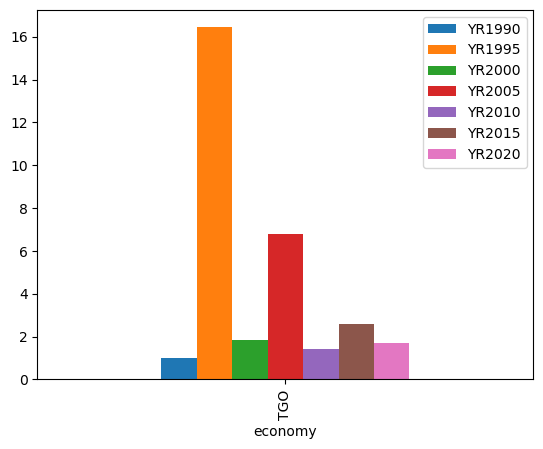

In [24]:
wb.data.DataFrame(['FP.CPI.TOTL.ZG'],
                     countries,
                      time=range(1990,2021,5)).plot.bar()

In [25]:
Chomage_indicator = wb.data.DataFrame('SL.UEM.TOTL.NE.ZS', countries, range(1990, 2021))  # Chômage (% de la population active) (estimation nationale).

Chomage_indicator  

YR1990  YR1991  YR1992  YR1993  YR1994  YR1995  YR1996  YR1997  \
economy                                                                   
TGO         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

         YR1998  YR1999  ...  YR2011  YR2012  YR2013  YR2014  YR2015  YR2016  \
economy                  ...                                                   
TGO         NaN     NaN  ...   1.982     NaN     NaN     NaN   2.204     NaN   

         YR2017  YR2018  YR2019  YR2020  
economy                                  
TGO       3.744     NaN   2.056     NaN  

[1 rows x 31 columns]

<Axes: xlabel='economy'>

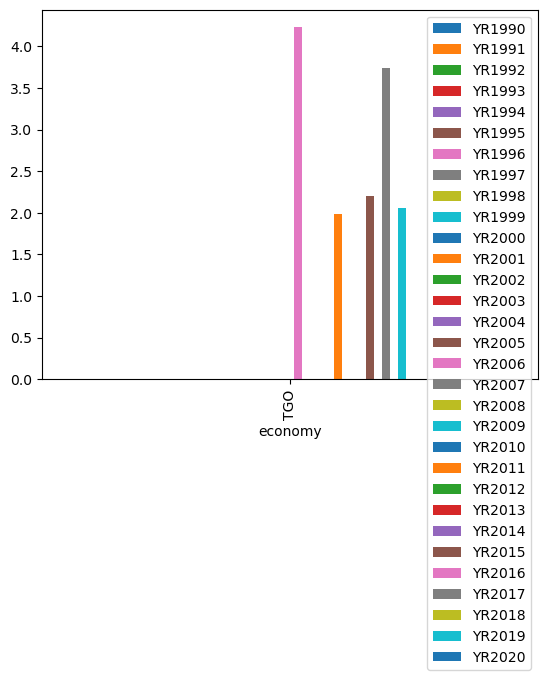

In [26]:
wb.data.DataFrame(['SL.UEM.TOTL.NE.ZS'],
                     countries,
                      time=range(1990,2021)).plot.bar()

In [27]:
Conso_indicator = wb.data.DataFrame('SI.SPR.PCAP', countries, range(1990, 2021)) # Consommation moyenne ou revenu moyen par habitant, population totale (en USD par jour, PPA de 2011). 

Conso_indicator 

YR1990  YR1991  YR1992  YR1993  YR1994  YR1995  YR1996  YR1997  \
economy                                                                   
TGO         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

         YR1998  YR1999  ...  YR2011  YR2012  YR2013  YR2014  YR2015  YR2016  \
economy                  ...                                                   
TGO         NaN     NaN  ...    2.66     NaN     NaN     NaN    2.73     NaN   

         YR2017  YR2018  YR2019  YR2020  
economy                                  
TGO         NaN     NaN     NaN     NaN  

[1 rows x 31 columns]

<Axes: xlabel='economy'>

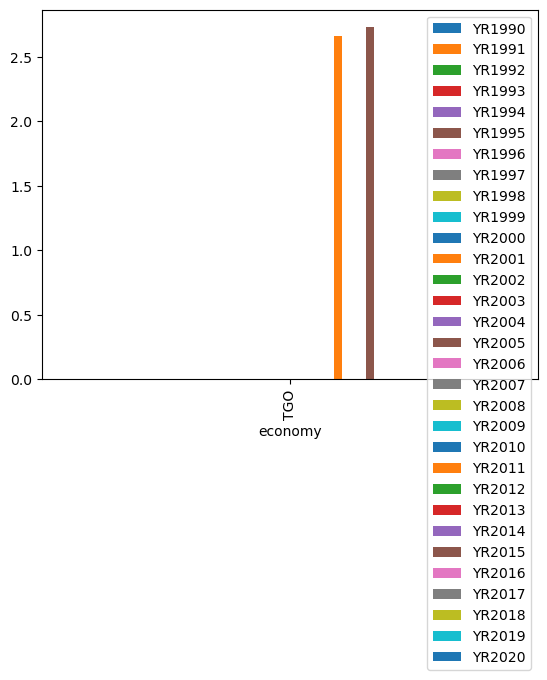

In [28]:
wb.data.DataFrame(['SI.SPR.PCAP'],
                     countries,
                      time=range(1990,2021)).plot.bar()

In [29]:
list_values_PIB = []

PIB=wb.data.DataFrame('NY.GDP.PCAP.PP.CD', 
                    economy = countries,
                      
                    time = range(1990, 2021), numericTimeKeys = True,
                    labels = True).set_index('Country')

for (column_name, column_data) in PIB.items():

    list_values_PIB.append(column_data.values)
    
list_values_PIB 

[array([1145.24035338]),
 array([1142.01417336]),
 array([1089.8591387]),
 array([953.73273631]),
 array([1116.15086753]),
 array([1175.2754686]),
 array([1253.8184564]),
 array([1412.22599095]),
 array([1355.21837545]),
 array([1368.02098659]),
 array([1349.22397812]),
 array([1353.8402806]),
 array([1390.76418512]),
 array([1474.58116569]),
 array([1460.49228876]),
 array([1399.20029226]),
 array([1439.60451977]),
 array([1419.26592274]),
 array([1462.5523927]),
 array([1509.47377425]),
 array([1574.42186245]),
 array([1656.1619505]),
 array([1677.29628559]),
 array([1739.13224968]),
 array([1818.04189531]),
 array([1884.96673035]),
 array([1928.14112525]),
 array([1970.21483978]),
 array([2063.38210892]),
 array([2151.28514317]),
 array([2173.87292875])]

In [30]:
list_values_Inflation = []

Inflation=wb.data.DataFrame('FP.CPI.TOTL.ZG', 
                    economy = countries,
                      
                    time = range(1990, 2021), numericTimeKeys = True,
                    labels = True).set_index('Country')

for (column_name, column_data) in Inflation.items():

    list_values_Inflation.append(column_data.values)
    
list_values_Inflation

[array([1.01534151]),
 array([0.3870818]),
 array([1.39378664]),
 array([-1.00688169]),
 array([39.16276738]),
 array([16.43350345]),
 array([4.6875]),
 array([8.25082508]),
 array([0.97533838]),
 array([-0.05321362]),
 array([1.86260595]),
 array([3.91959134]),
 array([3.05981858]),
 array([-0.93000088]),
 array([0.39307868]),
 array([6.78292893]),
 array([2.22897779]),
 array([0.94567327]),
 array([8.69482814]),
 array([3.71360592]),
 array([1.44594517]),
 array([3.56351473]),
 array([2.57718174]),
 array([1.82539476]),
 array([0.19087508]),
 array([2.58500391]),
 array([1.28544847]),
 array([-0.98188987]),
 array([0.92775543]),
 array([0.67465277]),
 array([1.69928463])]

In [31]:

list_values_Chomage = []

Chomage=wb.data.DataFrame('SL.UEM.TOTL.NE.ZS', 
                    economy = countries,
                      
                    time = range(1990, 2021), numericTimeKeys = True,
                    labels = True).set_index('Country')

for (column_name, column_data) in Chomage.items():

    list_values_Chomage.append(column_data.values)
    
list_values_Chomage 

[array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([4.229]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([1.982]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([2.204]),
 array([nan]),
 array([3.744]),
 array([nan]),
 array([2.056]),
 array([nan])]

In [32]:
list_values_Conso = []

Conso=wb.data.DataFrame('SI.SPR.PCAP', 
                    economy = countries,
                      
                    time = range(1990, 2021), numericTimeKeys = True,
                    labels = True).set_index('Country')

for (column_name, column_data) in Conso.items():

    list_values_Conso.append(column_data.values)
    
list_values_Conso 

[array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([2.66]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([2.73]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan])]

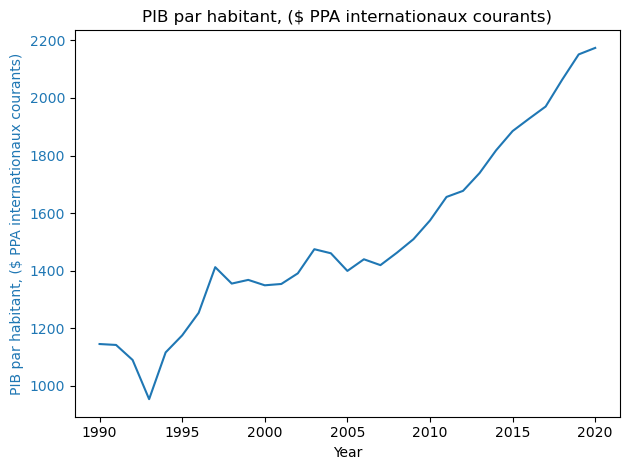

In [33]:
import matplotlib.pyplot as plt
import numpy as np

years=np.arange(1990, 2021)
fig, ax1=plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('PIB par habitant, ($ PPA internationaux courants)', color='tab:blue')
ax1.plot(years, list_values_PIB, color='tab:blue', label='PIB par habitant, ($ PPA internationaux courants)')
ax1.tick_params(axis='y', labelcolor='tab:blue')

plt.title('PIB par habitant, ($ PPA internationaux courants)')
fig.tight_layout()
plt.show()

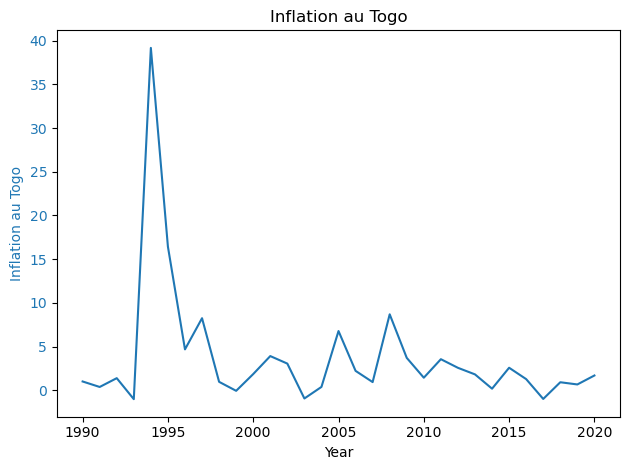

In [34]:
import matplotlib.pyplot as plt
import numpy as np

years=np.arange(1990, 2021)
fig, ax1=plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('Inflation au Togo', color='tab:blue')
ax1.plot(years, list_values_Inflation, color='tab:blue', label='Inflation au Togo')
ax1.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Inflation au Togo')
fig.tight_layout()
plt.show()

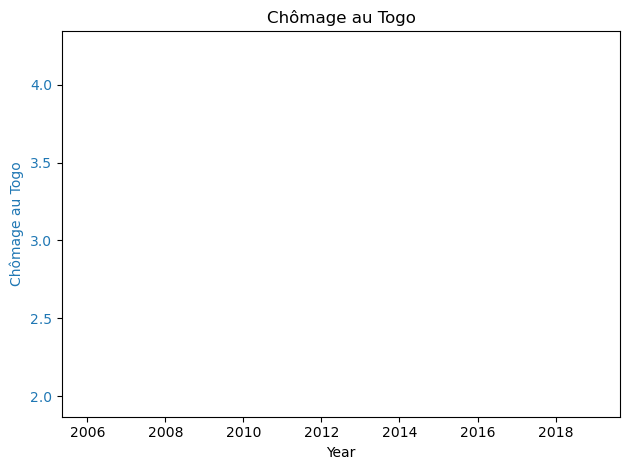

In [35]:
import matplotlib.pyplot as plt
import numpy as np

years=np.arange(1990, 2021)
fig, ax1=plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('Chômage au Togo', color='tab:blue')
ax1.plot(years, list_values_Chomage, color='tab:blue', label='Chômage au Togo')
ax1.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Chômage au Togo')
fig.tight_layout()
plt.show()

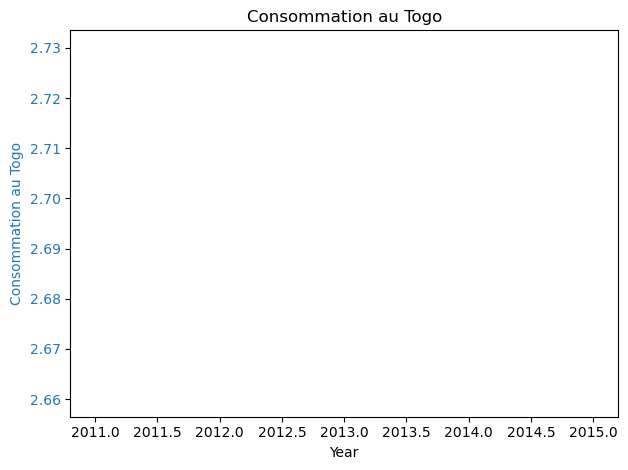

In [36]:
import matplotlib.pyplot as plt
import numpy as np

years=np.arange(1990, 2021)
fig, ax1=plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('Consommation au Togo', color='tab:blue')
ax1.plot(years, list_values_Conso, color='tab:blue', label='Consommation au Togo')
ax1.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Consommation au Togo')
fig.tight_layout()
plt.show()

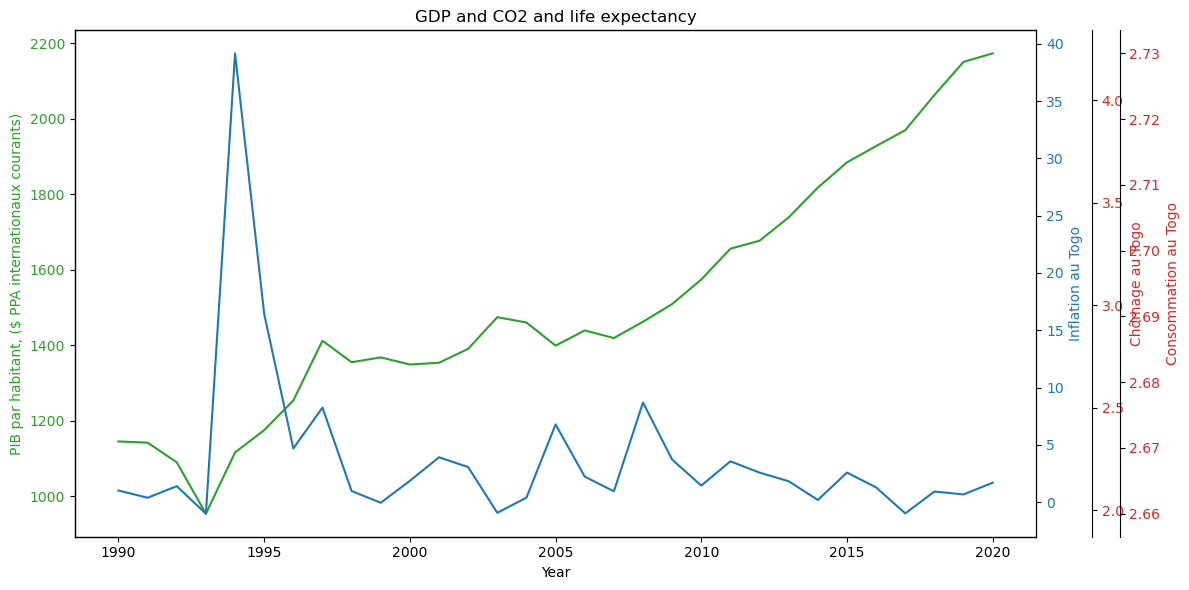

In [37]:
import matplotlib.pyplot as plt
import numpy as np

years=np.arange(1990, 2021)
fig, ax1=plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Year')
ax1.set_ylabel('PIB par habitant, ($ PPA internationaux courants)', color='tab:green')
ax1.plot(years, list_values_PIB, color='tab:green', label='PIB par habitant, ($ PPA internationaux courants)')
ax1.tick_params(axis='y', labelcolor='tab:green')

ax2=ax1.twinx()
ax2.set_xlabel('Year')
ax2.set_ylabel('Inflation au Togo', color='tab:blue')
ax2.plot(years, list_values_Inflation, color='tab:blue', label='Inflation au Togo')
ax2.tick_params(axis='y', labelcolor='tab:blue')

ax3=ax1.twinx()
ax3.spines['right'].set_position(('outward', 40))
ax3.set_ylabel('Chômage au Togo', color='tab:red')
ax3.plot(years, list_values_Chomage, color='tab:red', label='Chômage au Togo')
ax3.tick_params(axis='y', labelcolor='tab:red')

ax4=ax1.twinx()
ax4.spines['right'].set_position(('outward', 60))
ax4.set_ylabel('Consommation au Togo', color='tab:red')
ax4.plot(years, list_values_Conso, color='tab:red', label='Consommation au Togo')
ax4.tick_params(axis='y', labelcolor='tab:red')

plt.title('GDP and CO2 and life expectancy')
fig.tight_layout()
plt.show()

In [38]:
#QUESTION 3 : Analyse de Cluster

# PIB par habitant. NY.GDP.PCAP.PP.KD
# Pauvreté à $ 1,90 par jour (2011 PPA) (%). SI.POV.GAPS
# Indice du capital humain, limite supérieure (échelle comprise entre 0 et 1). HD.HCI.OVRL.UB
# Indice du capital humain, limite inférieure (échelle comprise entre 0 et 1). HD.HCI.OVRL.LB

In [39]:
PIB_HA = wb.data.DataFrame('NY.GDP.PCAP.PP.KD', countries, range(1990, 2021)) # PIB par habitant
PIB_HA

YR1990       YR1991       YR1992       YR1993       YR1994  \
economy                                                                    
TGO      1800.320174  1736.523527  1620.292627  1385.082465  1587.067681   

              YR1995       YR1996       YR1997       YR1998       YR1999  ...  \
economy                                                                   ...   
TGO      1636.815236  1714.805132  1898.711783  1801.786394  1793.532639  ...   

              YR2011       YR2012      YR2013       YR2014       YR2015  \
economy                                                                   
TGO      1687.611068  1747.884212  1802.93898  1856.904814  1910.000045   

              YR2016      YR2017       YR2018       YR2019      YR2020  
economy                                                                 
TGO      1941.627596  1970.21484  2014.941729  2063.758736  2058.56506  

[1 rows x 31 columns]

In [40]:
Pauvrete_indic = wb.data.DataFrame('SI.POV.GAPS', countries, range(1990, 2021))  # Pauvreté à $ 1,90 par jour (2011 PPA) (%)
Pauvrete_indic

YR1990  YR1991  YR1992  YR1993  YR1994  YR1995  YR1996  YR1997  \
economy                                                                   
TGO         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

         YR1998  YR1999  ...  YR2011  YR2012  YR2013  YR2014  YR2015  YR2016  \
economy                  ...                                                   
TGO         NaN     NaN  ...    26.7     NaN     NaN     NaN    23.5     NaN   

         YR2017  YR2018  YR2019  YR2020  
economy                                  
TGO         NaN     8.5     NaN     NaN  

[1 rows x 31 columns]

In [41]:
ICH_lim_sup_indicator = wb.data.DataFrame('HD.HCI.OVRL.UB', countries, range(1990, 2021))  # Indice du capital humain, limite supérieure (échelle comprise entre 0 et 1)
ICH_lim_sup_indicator

YR1990  YR1991  YR1992  YR1993  YR1994  YR1995  YR1996  YR1997  \
economy                                                                   
TGO         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

         YR1998  YR1999  ...  YR2011  YR2012  YR2013  YR2014  YR2015  YR2016  \
economy                  ...                                                   
TGO         NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   

         YR2017    YR2018  YR2019    YR2020  
economy                                      
TGO       0.431  0.440186     NaN  0.452463  

[1 rows x 31 columns]

In [42]:
ICH_lim_inf_indicator = wb.data.DataFrame('HD.HCI.OVRL.LB', countries, range(1990, 2021))  # Indice du capital humain, limite inférieure (échelle comprise entre 0 et 1)
ICH_lim_inf_indicator

YR1990  YR1991  YR1992  YR1993  YR1994  YR1995  YR1996  YR1997  \
economy                                                                   
TGO         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

         YR1998  YR1999  ...  YR2011  YR2012  YR2013  YR2014  YR2015  YR2016  \
economy                  ...                                                   
TGO         NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   

         YR2017    YR2018  YR2019    YR2020  
economy                                      
TGO       0.394  0.400345     NaN  0.409654  

[1 rows x 31 columns]

<Axes: xlabel='economy'>

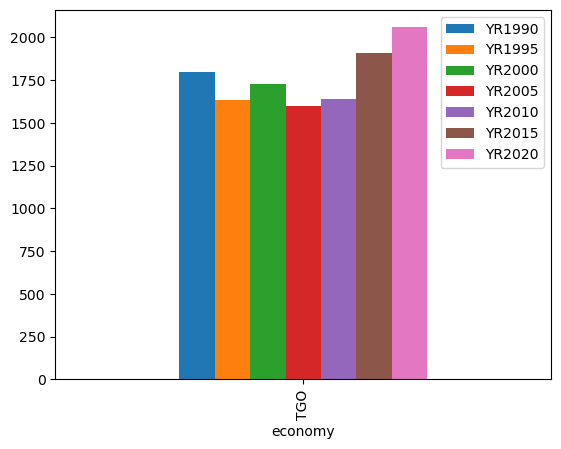

In [43]:
wb.data.DataFrame(['NY.GDP.PCAP.PP.KD'],
                     countries,
                      time=range(1990,2021,5)).plot.bar() 

<Axes: xlabel='economy'>

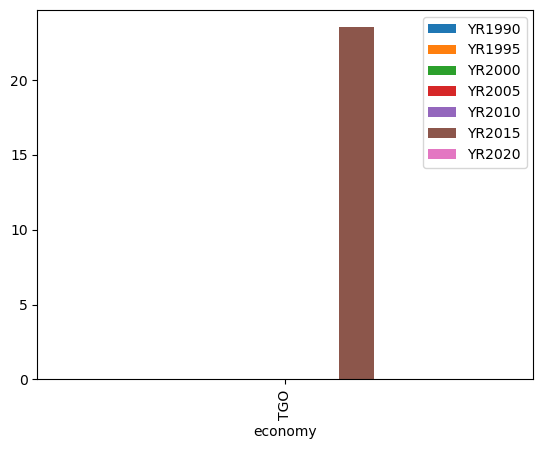

In [44]:
wb.data.DataFrame(['SI.POV.GAPS'],
                     countries,
                      time=range(1990,2021,5)).plot.bar() 

<Axes: xlabel='economy'>

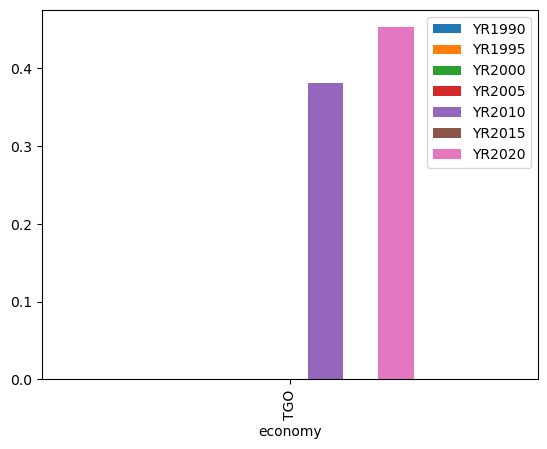

In [45]:
wb.data.DataFrame(['HD.HCI.OVRL.UB'],
                     countries,
                      time=range(1990,2021,5)).plot.bar() 

<Axes: xlabel='economy'>

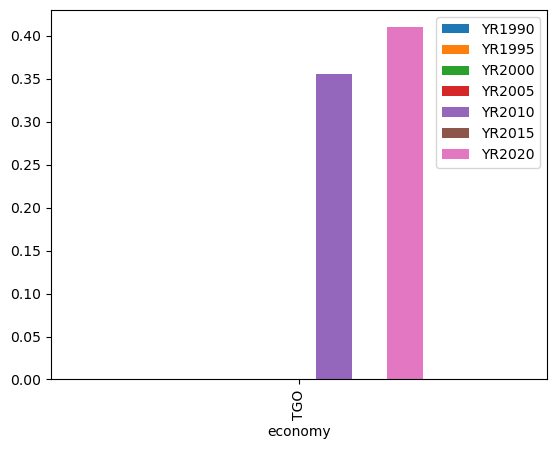

In [46]:
wb.data.DataFrame(['HD.HCI.OVRL.LB'],
                     countries,
                      time=range(1990,2021,5)).plot.bar() 

In [47]:
list_values_PIB_HA = []

gdp=wb.data.DataFrame('NY.GDP.PCAP.PP.KD', 
                    economy = countries,
                      
                    time = range(1990, 2021), numericTimeKeys = True,
                    labels = True).set_index('Country')

for (column_name, column_data) in PIB_HA.items():

    list_values_PIB_HA.append(column_data.values)
    
list_values_PIB_HA    

[array([1800.32017413]),
 array([1736.52352747]),
 array([1620.2926265]),
 array([1385.08246528]),
 array([1587.06768079]),
 array([1636.81523647]),
 array([1714.80513216]),
 array([1898.7117835]),
 array([1801.78639414]),
 array([1793.53263883]),
 array([1729.70175791]),
 array([1697.37871238]),
 array([1716.91346228]),
 array([1785.15463371]),
 array([1721.87620122]),
 array([1599.45858532]),
 array([1596.38773547]),
 array([1532.42006065]),
 array([1549.44041224]),
 array([1588.96477697]),
 array([1637.65195835]),
 array([1687.61106815]),
 array([1747.88421246]),
 array([1802.93897953]),
 array([1856.90481374]),
 array([1910.00004506]),
 array([1941.62759622]),
 array([1970.21483978]),
 array([2014.94172914]),
 array([2063.75873637]),
 array([2058.56505955])]

In [48]:
list_values_Pauvrete_indic = []

gdp=wb.data.DataFrame('SI.POV.GAPS', 
                    economy = countries,
                      
                    time = range(1990, 2021), numericTimeKeys = True,
                    labels = True).set_index('Country')

for (column_name, column_data) in Pauvrete_indic.items():

    list_values_Pauvrete_indic.append(column_data.values)
    
list_values_Pauvrete_indic  

[array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([24.9]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([26.7]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([23.5]),
 array([nan]),
 array([nan]),
 array([8.5]),
 array([nan]),
 array([nan])]

In [49]:
list_values_ICH_lim_sup_indicator = []

ICH_lim_sup_indicator=wb.data.DataFrame('HD.HCI.OVRL.UB', 
                    economy = countries,
                      
                    time = range(1990, 2021), numericTimeKeys = True,
                    labels = True).set_index('Country')

for (column_name, column_data) in ICH_lim_sup_indicator.items():

    list_values_ICH_lim_sup_indicator.append(column_data.values)
    
list_values_ICH_lim_sup_indicator  

[array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([0.38080177]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([0.431]),
 array([0.4401862]),
 array([nan]),
 array([0.45246288])]

In [50]:
list_values_ICH_lim_inf_indicator = []

gdp=wb.data.DataFrame('HD.HCI.OVRL.LB', 
                    economy = countries,
                      
                    time = range(1990, 2021), numericTimeKeys = True,
                    labels = True).set_index('Country')

for (column_name, column_data) in ICH_lim_inf_indicator.items():

    list_values_ICH_lim_inf_indicator.append(column_data.values)
    
list_values_ICH_lim_inf_indicator  

[array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([0.35521924]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([nan]),
 array([0.394]),
 array([0.40034521]),
 array([nan]),
 array([0.40965357])]

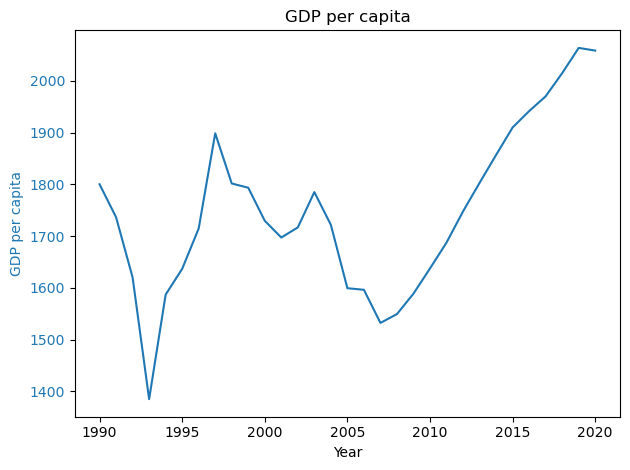

In [51]:
import matplotlib.pyplot as plt
import numpy as np

years=np.arange(1990, 2021)
fig, ax1=plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('GDP per capita', color='tab:blue')
ax1.plot(years, list_values_PIB_HA, color='tab:blue', label='GDP per cap')
ax1.tick_params(axis='y', labelcolor='tab:blue')

plt.title('GDP per capita')
fig.tight_layout()
plt.show()

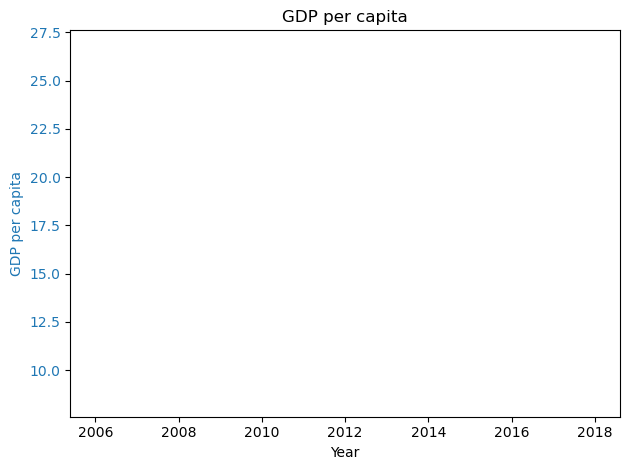

In [52]:
import matplotlib.pyplot as plt
import numpy as np

years=np.arange(1990, 2021)
fig, ax1=plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('GDP per capita', color='tab:blue')
ax1.plot(years, list_values_Pauvrete_indic , color='tab:blue', label='GDP per cap')
ax1.tick_params(axis='y', labelcolor='tab:blue')

plt.title('GDP per capita')
fig.tight_layout()
plt.show()

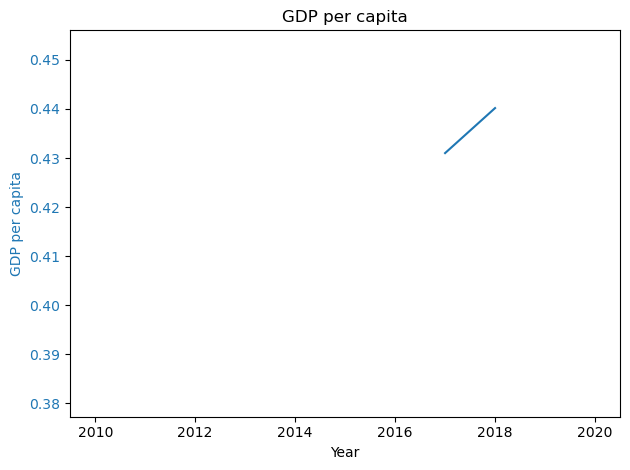

In [53]:
import matplotlib.pyplot as plt
import numpy as np

years=np.arange(1990, 2021)
fig, ax1=plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('GDP per capita', color='tab:blue')
ax1.plot(years, list_values_ICH_lim_sup_indicator, color='tab:blue', label='GDP per cap')
ax1.tick_params(axis='y', labelcolor='tab:blue')

plt.title('GDP per capita')
fig.tight_layout()
plt.show()

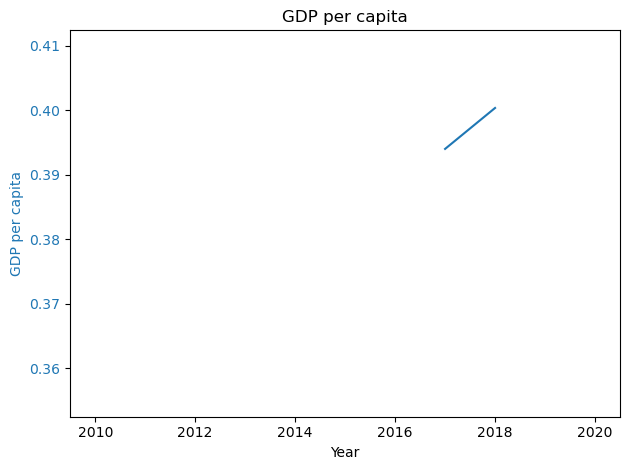

In [54]:
import matplotlib.pyplot as plt
import numpy as np

years=np.arange(1990, 2021)
fig, ax1=plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('GDP per capita', color='tab:blue')
ax1.plot(years, list_values_ICH_lim_inf_indicator, color='tab:blue', label='GDP per cap')
ax1.tick_params(axis='y', labelcolor='tab:blue')

plt.title('GDP per capita')
fig.tight_layout()
plt.show()

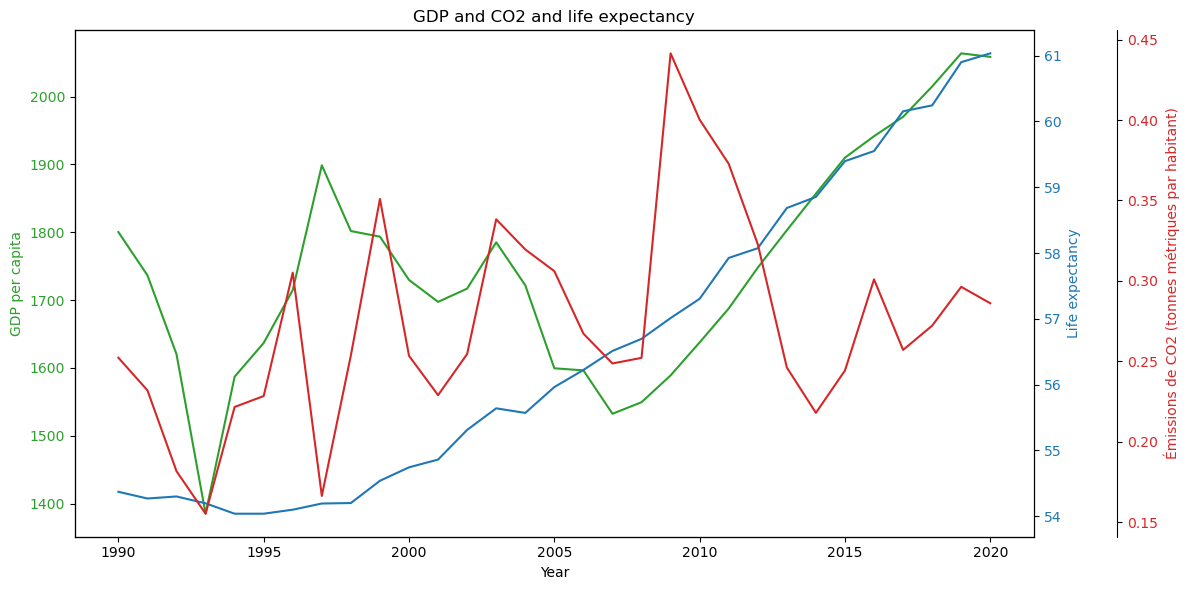

In [55]:
import matplotlib.pyplot as plt
import numpy as np

years=np.arange(1990, 2021)
fig, ax1=plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Year')
ax1.set_ylabel('GDP per capita', color='tab:green')
ax1.plot(years, list_values_gdp, color='tab:green', label='GDP per cap')
ax1.tick_params(axis='y', labelcolor='tab:green')

ax2=ax1.twinx()
ax2.set_xlabel('Year')
ax2.set_ylabel('Life expectancy', color='tab:blue')
ax2.plot(years, list_values_life_expectancy, color='tab:blue', label='GDP per cap')
ax2.tick_params(axis='y', labelcolor='tab:blue')

ax3=ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
ax3.set_ylabel('Émissions de CO2 (tonnes métriques par habitant)', color='tab:red')
ax3.plot(years, list_values_CO2_emissions, color='tab:red', label='Émissions de CO2')
ax3.tick_params(axis='y', labelcolor='tab:red')

plt.title('GDP and CO2 and life expectancy')
fig.tight_layout()
plt.show()

In [56]:
###QUESTION 4 : Prédictions des Tendances Futures

# Agriculture, valeur ajoutée (% de croissance annuelle). NV.AGR.TOTL.KD.ZG

# Industrie, valeur ajoutée (en $ US actuels). NV.IND.TOTL.CD
# Industrie, valeur ajoutée (% du PIB). NV.IND.TOTL.ZS

# Industrie, valeur ajoutée (% de croissance annuelle). NV.IND.TOTL.KD.ZG

# Inflation, prix à la consommation (% annuel). FP.CPI.TOTL.ZG


In [57]:
Agriculture = wb.data.DataFrame('NV.AGR.TOTL.KD.ZG', countries, range(1990, 2021)) # PIB par habitant
Agriculture

YR1990    YR1991    YR1992    YR1993    YR1994    YR1995  \
economy                                                               
TGO      2.991761 -1.138791  1.223445  5.994375 -0.062683  5.544884   

            YR1996    YR1997    YR1998    YR1999  ...    YR2011    YR2012  \
economy                                           ...                       
TGO      16.366716  4.463174 -2.761041  5.484821  ... -0.596307  7.513952   

           YR2013     YR2014   YR2015    YR2016    YR2017    YR2018    YR2019  \
economy                                                                         
TGO     -5.551212  15.469563 -0.65678  2.921729  6.806778  4.595203  5.554733   

           YR2020  
economy            
TGO     -0.910954  

[1 rows x 31 columns]

In [58]:
Industrie_actu = wb.data.DataFrame('NV.IND.TOTL.CD', countries, range(1990, 2021)) # PIB par habitant
Industrie_actu

YR1990        YR1991        YR1992        YR1993        YR1994  \
economy                                                                         
TGO      3.668604e+08  4.030677e+08  4.024681e+08  2.550478e+08  2.085883e+08   

               YR1995        YR1996        YR1997        YR1998        YR1999  \
economy                                                                         
TGO      2.904307e+08  3.086305e+08  3.016381e+08  2.676490e+08  2.555756e+08   

         ...        YR2011        YR2012        YR2013        YR2014  \
economy  ...                                                           
TGO      ...  1.180148e+09  1.083545e+09  1.336735e+09  1.524658e+09   

               YR2015        YR2016        YR2017        YR2018        YR2019  \
economy                                                                         
TGO      1.316068e+09  1.271902e+09  1.303138e+09  1.478227e+09  1.352688e+09   

               YR2020  
economy                
TGO      1.502816e+09  

[1 rows x 31 columns]

In [59]:
Industrie_PIB = wb.data.DataFrame('NV.IND.TOTL.ZS', countries, range(1990, 2021)) # PIB par habitant
Industrie_PIB

YR1990     YR1991     YR1992     YR1993     YR1994    YR1995  \
economy                                                                    
TGO      22.528503  25.155572  23.773053  20.676811  21.227674  22.18073   

            YR1996     YR1997     YR1998    YR1999  ...     YR2011     YR2012  \
economy                                             ...                         
TGO      21.060487  20.123277  16.861414  16.20981  ...  21.764149  20.015464   

            YR2013    YR2014     YR2015     YR2016     YR2017     YR2018  \
economy                                                                    
TGO      22.198525  23.84769  22.866441  20.949867  20.401623  21.029758   

           YR2019     YR2020  
economy                       
TGO      19.34442  20.074939  

[1 rows x 31 columns]

In [60]:
Industrie_croissance_annuelle = wb.data.DataFrame('NV.IND.TOTL.KD.ZG', countries, range(1990, 2021)) # PIB par habitant
Industrie_croissance_annuelle

YR1990    YR1991    YR1992     YR1993     YR1994     YR1995  \
economy                                                                  
TGO     -4.442643  7.082227 -7.689665 -29.377898  26.333455  20.752147   

          YR1996    YR1997    YR1998    YR1999  ...    YR2011    YR2012  \
economy                                         ...                       
TGO      5.22478  2.296416 -9.097167  2.788846  ...  8.604258 -3.035146   

            YR2013     YR2014    YR2015     YR2016    YR2017    YR2018  \
economy                                                                  
TGO      22.316106  10.272512 -0.483294  16.185911  1.268879  8.272435   

           YR2019    YR2020  
economy                      
TGO     -1.359734  5.539933  

[1 rows x 31 columns]

In [61]:
Inflation_conso = wb.data.DataFrame('FP.CPI.TOTL.ZG', countries, range(1990, 2021)) # PIB par habitant
Inflation_conso

YR1990    YR1991    YR1992    YR1993     YR1994     YR1995  YR1996  \
economy                                                                         
TGO      1.015342  0.387082  1.393787 -1.006882  39.162767  16.433503  4.6875   

           YR1997    YR1998    YR1999  ...    YR2011    YR2012    YR2013  \
economy                                ...                                 
TGO      8.250825  0.975338 -0.053214  ...  3.563515  2.577182  1.825395   

           YR2014    YR2015    YR2016   YR2017    YR2018    YR2019    YR2020  
economy                                                                       
TGO      0.190875  2.585004  1.285448 -0.98189  0.927755  0.674653  1.699285  

[1 rows x 31 columns]

<Axes: xlabel='economy'>

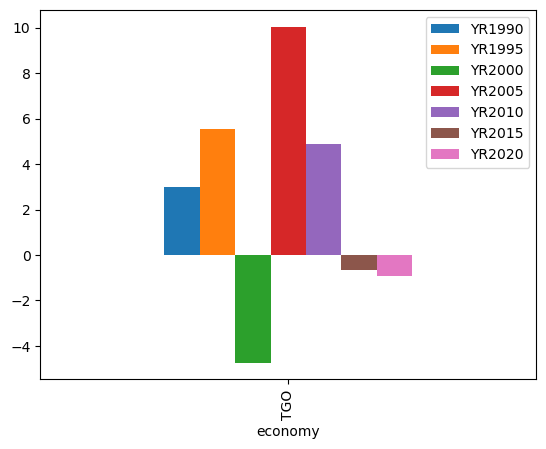

In [62]:
wb.data.DataFrame(['NV.AGR.TOTL.KD.ZG'],
                     countries,
                      time=range(1990,2021,5)).plot.bar() 

<Axes: xlabel='economy'>

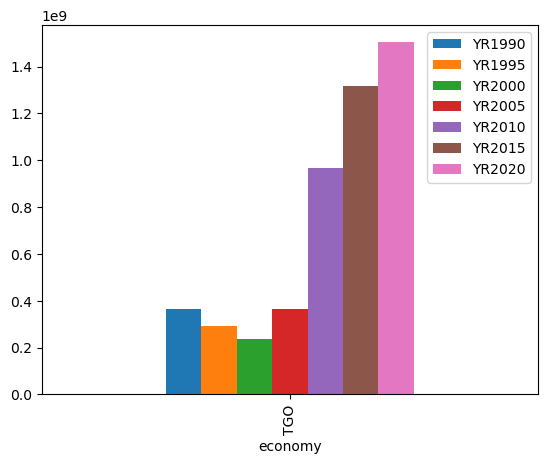

In [63]:
wb.data.DataFrame(['NV.IND.TOTL.CD'],
                     countries,
                      time=range(1990,2021,5)).plot.bar() 

<Axes: xlabel='economy'>

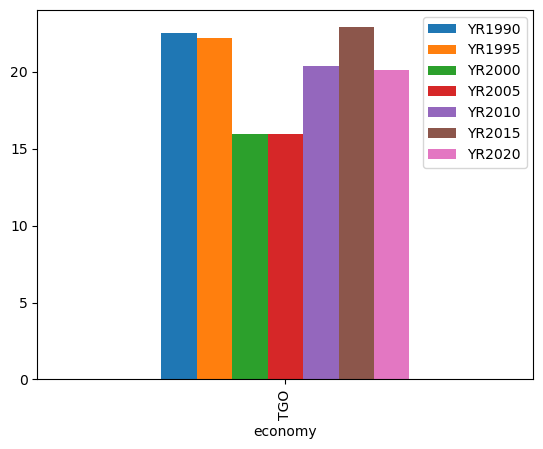

In [64]:
wb.data.DataFrame(['NV.IND.TOTL.ZS'],
                     countries,
                      time=range(1990,2021,5)).plot.bar() 

<Axes: xlabel='economy'>

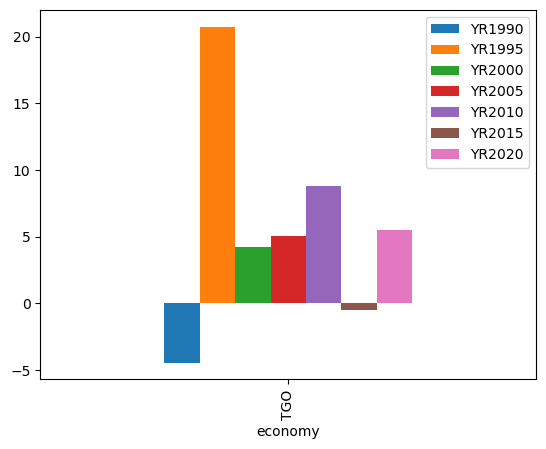

In [65]:
wb.data.DataFrame(['NV.IND.TOTL.KD.ZG'],
                     countries,
                      time=range(1990,2021,5)).plot.bar() 

<Axes: xlabel='economy'>

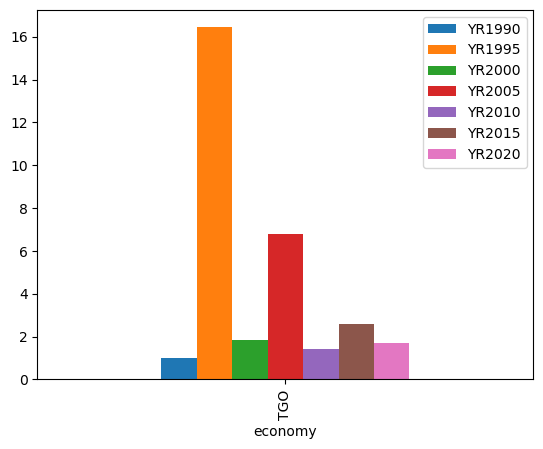

In [66]:
wb.data.DataFrame(['FP.CPI.TOTL.ZG'],
                     countries,
                      time=range(1990,2021,5)).plot.bar() 

In [67]:
list_values_Agriculture = []

Agriculture=wb.data.DataFrame('NV.AGR.TOTL.KD.ZG', 
                    economy = countries,
                      
                    time = range(1990, 2021), numericTimeKeys = True,
                    labels = True).set_index('Country')

for (column_name, column_data) in Agriculture.items():

    list_values_Agriculture.append(column_data.values)
    
list_values_Agriculture 

[array([2.99176081]),
 array([-1.138791]),
 array([1.22344499]),
 array([5.9943751]),
 array([-0.06268331]),
 array([5.54488437]),
 array([16.36671595]),
 array([4.46317431]),
 array([-2.7610406]),
 array([5.48482078]),
 array([-4.73537901]),
 array([5.59065174]),
 array([0.31857666]),
 array([-1.63006923]),
 array([3.36749969]),
 array([10.04718816]),
 array([-5.25443527]),
 array([2.11891476]),
 array([-3.85245521]),
 array([12.55552983]),
 array([4.88581705]),
 array([-0.596307]),
 array([7.51395247]),
 array([-5.5512121]),
 array([15.46956253]),
 array([-0.65677966]),
 array([2.9217288]),
 array([6.80677815]),
 array([4.59520296]),
 array([5.55473315]),
 array([-0.91095447])]

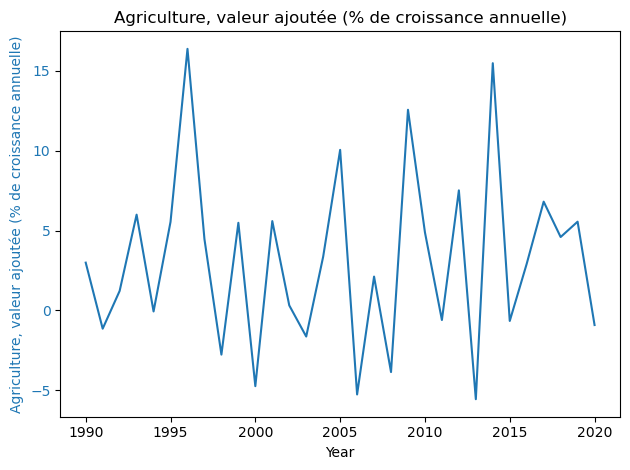

In [68]:
import matplotlib.pyplot as plt
import numpy as np

years=np.arange(1990, 2021)
fig, ax1=plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('Agriculture, valeur ajoutée (% de croissance annuelle)', color='tab:blue')
ax1.plot(years, list_values_Agriculture, color='tab:blue', label='Agriculture, valeur ajoutée (% de croissance annuelle)')
ax1.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Agriculture, valeur ajoutée (% de croissance annuelle)')
fig.tight_layout()
plt.show()

In [69]:
list_values_Industrie_actu = []

Industrie_actu=wb.data.DataFrame('NV.IND.TOTL.CD', 
                    economy = countries,
                      
                    time = range(1990, 2021), numericTimeKeys = True,
                    labels = True).set_index('Country')

for (column_name, column_data) in Industrie_actu.items():

    list_values_Industrie_actu.append(column_data.values)
    
list_values_Industrie_actu 

[array([3.6686035e+08]),
 array([4.03067688e+08]),
 array([4.02468064e+08]),
 array([2.55047826e+08]),
 array([2.0858829e+08]),
 array([2.90430662e+08]),
 array([3.08630528e+08]),
 array([3.01638054e+08]),
 array([2.67648991e+08]),
 array([2.55575646e+08]),
 array([2.37688745e+08]),
 array([2.28744847e+08]),
 array([2.72506086e+08]),
 array([3.0883737e+08]),
 array([3.32741648e+08]),
 array([3.63732958e+08]),
 array([4.061869e+08]),
 array([9.88434333e+08]),
 array([1.09262098e+09]),
 array([9.75678114e+08]),
 array([9.652618e+08]),
 array([1.18014774e+09]),
 array([1.08354546e+09]),
 array([1.33673517e+09]),
 array([1.52465787e+09]),
 array([1.31606834e+09]),
 array([1.27190155e+09]),
 array([1.30313821e+09]),
 array([1.47822709e+09]),
 array([1.35268835e+09]),
 array([1.50281625e+09])]

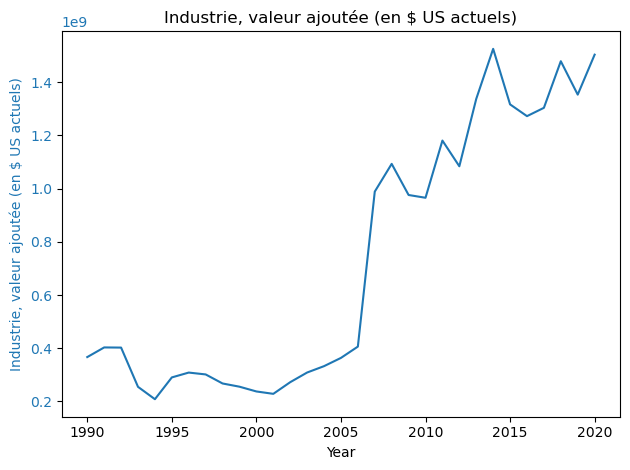

In [70]:
import matplotlib.pyplot as plt
import numpy as np

years=np.arange(1990, 2021)
fig, ax1=plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('Industrie, valeur ajoutée (en $ US actuels)', color='tab:blue')
ax1.plot(years, list_values_Industrie_actu, color='tab:blue', label='Industrie, valeur ajoutée (en $ US actuels)')
ax1.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Industrie, valeur ajoutée (en $ US actuels)')
fig.tight_layout()
plt.show()

In [71]:
list_values_Industrie_PIB = []

gdp=wb.data.DataFrame('NV.IND.TOTL.ZS', 
                    economy = countries,
                      
                    time = range(1990, 2021), numericTimeKeys = True,
                    labels = True).set_index('Country')

for (column_name, column_data) in Industrie_PIB.items():

    list_values_Industrie_PIB.append(column_data.values)
    
list_values_Industrie_PIB 

[array([22.52850254]),
 array([25.15557231]),
 array([23.77305296]),
 array([20.67681067]),
 array([21.22767402]),
 array([22.18072958]),
 array([21.06048699]),
 array([20.12327685]),
 array([16.86141444]),
 array([16.20981015]),
 array([15.93204331]),
 array([15.43031703]),
 array([15.96686003]),
 array([14.59646836]),
 array([14.7231306]),
 array([15.94282998]),
 array([17.27290262]),
 array([26.28840688]),
 array([23.86235987]),
 array([20.66288013]),
 array([20.3367703]),
 array([21.76414903]),
 array([20.01546356]),
 array([22.19852528]),
 array([23.84768999]),
 array([22.86644053]),
 array([20.94986725]),
 array([20.40162301]),
 array([21.02975832]),
 array([19.34441978]),
 array([20.0749387])]

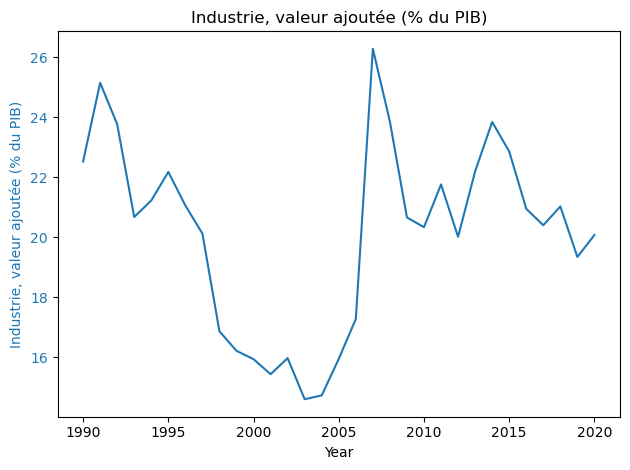

In [72]:
import matplotlib.pyplot as plt
import numpy as np

years=np.arange(1990, 2021)
fig, ax1=plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('Industrie, valeur ajoutée (% du PIB)', color='tab:blue')
ax1.plot(years, list_values_Industrie_PIB, color='tab:blue', label='Industrie, valeur ajoutée (% du PIB)')
ax1.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Industrie, valeur ajoutée (% du PIB)')
fig.tight_layout()
plt.show()

In [73]:
list_values_Industrie_croissance_annuelle = []

Industrie_croissance_annuelle=wb.data.DataFrame('NV.IND.TOTL.KD.ZG', 
                    economy = countries,
                      
                    time = range(1990, 2021), numericTimeKeys = True,
                    labels = True).set_index('Country')

for (column_name, column_data) in Industrie_croissance_annuelle.items():

    list_values_Industrie_croissance_annuelle.append(column_data.values)
    
list_values_Industrie_croissance_annuelle 

[array([-4.44264315]),
 array([7.08222702]),
 array([-7.68966492]),
 array([-29.37789797]),
 array([26.3334554]),
 array([20.75214728]),
 array([5.22477996]),
 array([2.29641588]),
 array([-9.09716711]),
 array([2.78884572]),
 array([4.26357098]),
 array([1.05031377]),
 array([7.95434731]),
 array([3.45794752]),
 array([-3.74689788]),
 array([5.06818138]),
 array([7.90019345]),
 array([-5.68652347]),
 array([-2.09674288]),
 array([2.68667135]),
 array([8.78901134]),
 array([8.60425761]),
 array([-3.03514616]),
 array([22.3161065]),
 array([10.27251243]),
 array([-0.48329446]),
 array([16.18591099]),
 array([1.26887929]),
 array([8.27243463]),
 array([-1.35973408]),
 array([5.53993284])]

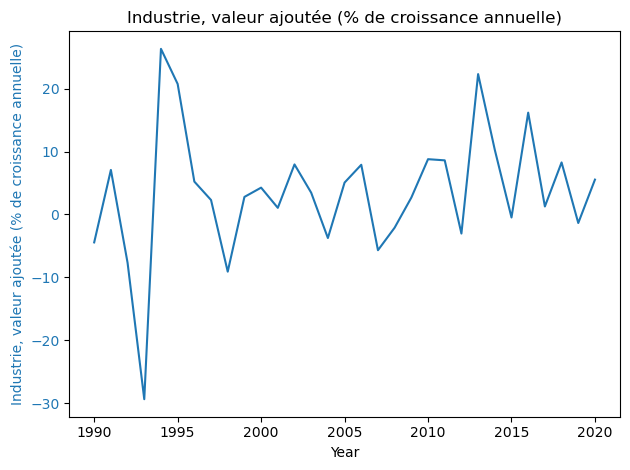

In [74]:
import matplotlib.pyplot as plt
import numpy as np

years=np.arange(1990, 2021)
fig, ax1=plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('Industrie, valeur ajoutée (% de croissance annuelle)', color='tab:blue')
ax1.plot(years, list_values_Industrie_croissance_annuelle, color='tab:blue', label='Industrie, valeur ajoutée (% de croissance annuelle)')
ax1.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Industrie, valeur ajoutée (% de croissance annuelle)')
fig.tight_layout()
plt.show()

In [75]:
list_values_Inflation_conso = []

Inflation_conso=wb.data.DataFrame('FP.CPI.TOTL.ZG', 
                    economy = countries,
                      
                    time = range(1990, 2021), numericTimeKeys = True,
                    labels = True).set_index('Country')

for (column_name, column_data) in Inflation_conso.items():

    list_values_Inflation_conso.append(column_data.values)
    
list_values_Inflation_conso 

[array([1.01534151]),
 array([0.3870818]),
 array([1.39378664]),
 array([-1.00688169]),
 array([39.16276738]),
 array([16.43350345]),
 array([4.6875]),
 array([8.25082508]),
 array([0.97533838]),
 array([-0.05321362]),
 array([1.86260595]),
 array([3.91959134]),
 array([3.05981858]),
 array([-0.93000088]),
 array([0.39307868]),
 array([6.78292893]),
 array([2.22897779]),
 array([0.94567327]),
 array([8.69482814]),
 array([3.71360592]),
 array([1.44594517]),
 array([3.56351473]),
 array([2.57718174]),
 array([1.82539476]),
 array([0.19087508]),
 array([2.58500391]),
 array([1.28544847]),
 array([-0.98188987]),
 array([0.92775543]),
 array([0.67465277]),
 array([1.69928463])]

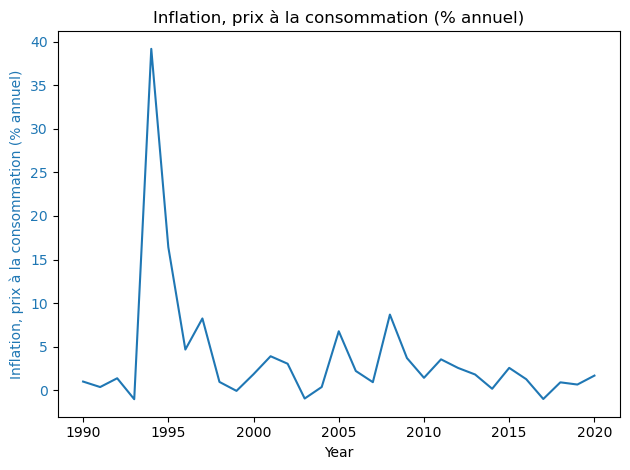

In [76]:
import matplotlib.pyplot as plt
import numpy as np

years=np.arange(1990, 2021)
fig, ax1=plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('Inflation, prix à la consommation (% annuel)', color='tab:blue')
ax1.plot(years, list_values_Inflation_conso, color='tab:blue', label='Inflation, prix à la consommation (% annuel)')
ax1.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Inflation, prix à la consommation (% annuel)')
fig.tight_layout()
plt.show()

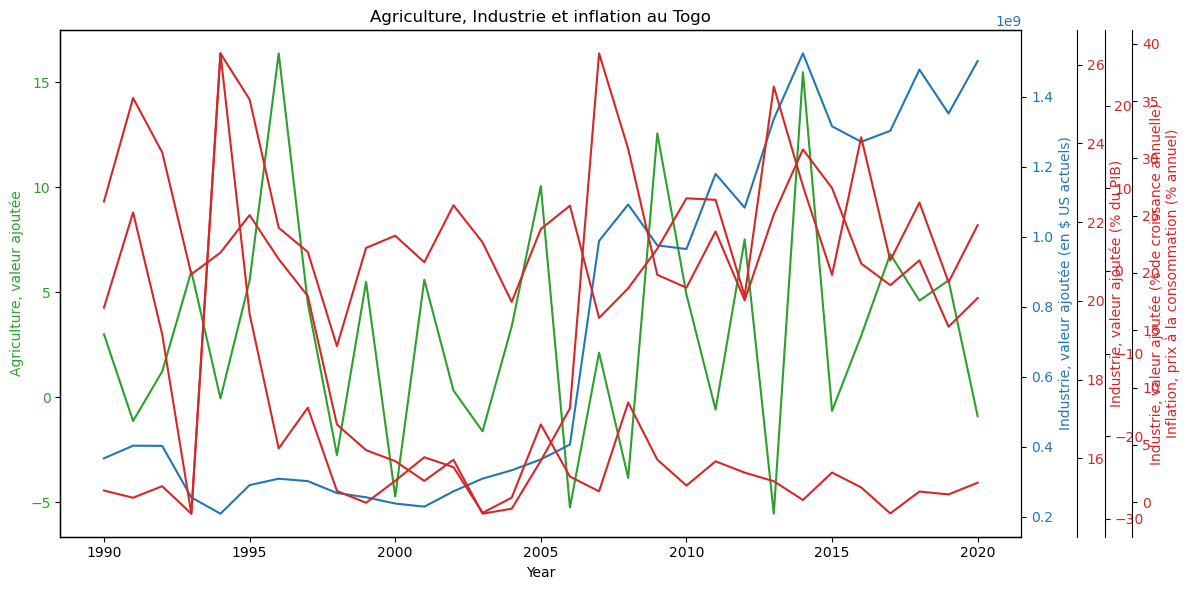

In [77]:
import matplotlib.pyplot as plt
import numpy as np

years=np.arange(1990, 2021)
fig, ax1=plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Year')
ax1.set_ylabel('Agriculture, valeur ajoutée', color='tab:green')
ax1.plot(years, list_values_Agriculture, color='tab:green', label='Agriculture')
ax1.tick_params(axis='y', labelcolor='tab:green')

ax2=ax1.twinx()
ax2.set_xlabel('Year')
ax2.set_ylabel('Industrie, valeur ajoutée (en $ US actuels)', color='tab:blue')
ax2.plot(years, list_values_Industrie_actu, color='tab:blue', label='Industrie, valeur ajoutée (en $ US actuels)')
ax2.tick_params(axis='y', labelcolor='tab:blue')

ax3=ax1.twinx()
ax3.spines['right'].set_position(('outward', 40))
ax3.set_ylabel('Industrie, valeur ajoutée (% du PIB)', color='tab:red')
ax3.plot(years, list_values_Industrie_PIB, color='tab:red', label='Industrie, valeur ajoutée (% du PIB)')
ax3.tick_params(axis='y', labelcolor='tab:red')

ax4=ax1.twinx()
ax4.spines['right'].set_position(('outward', 60))
ax4.set_ylabel('Industrie, valeur ajoutée (% de croissance annuelle)', color='tab:red')
ax4.plot(years, list_values_Industrie_croissance_annuelle, color='tab:red', label='Industrie, valeur ajoutée (% de croissance annuelle)')
ax4.tick_params(axis='y', labelcolor='tab:red')

ax5=ax1.twinx()
ax5.spines['right'].set_position(('outward', 80))
ax5.set_ylabel('Inflation, prix à la consommation (% annuel)', color='tab:red')
ax5.plot(years, list_values_Inflation_conso, color='tab:red', label='Inflation, prix à la consommation (% annuel)')
ax5.tick_params(axis='y', labelcolor='tab:red')

plt.title('Agriculture, Industrie et inflation au Togo')
fig.tight_layout()
plt.show()

In [78]:

# Migration nette. SM.POP.NETM
# Population urbaine (% du total). SP.URB.TOTL.IN.ZS
# Croissance de la population rurale (% annuel). SP.RUR.TOTL.ZG
# Population, total. SP.POP.TOTL
# Croissance de la population (% annuel). SP.POP.GROW
# Croissance de la population urbaine (% annuel). SP.URB.GROW

In [79]:
Migration_nette = wb.data.DataFrame('SM.POP.NETM', countries, range(1990, 2021)) 
Migration_nette

YR1990  YR1991  YR1992    YR1993   YR1994   YR1995   YR1996   YR1997  \
economy                                                                         
TGO        59.0   -72.0  -132.0 -291022.0  88992.0  57406.0  40915.0  11899.0   

          YR1998   YR1999  ...  YR2011  YR2012  YR2013  YR2014  YR2015  \
economy                    ...                                           
TGO      12365.0  11122.0  ... -1980.0 -1992.0 -1985.0 -1985.0 -1985.0   

         YR2016  YR2017  YR2018  YR2019  YR2020  
economy                                          
TGO     -1988.0 -1997.0 -1997.0 -1997.0  -995.0  

[1 rows x 31 columns]

In [80]:
Population_urbaine = wb.data.DataFrame('SP.URB.TOTL.IN.ZS', countries, range(1990, 2021)) 
Population_urbaine

YR1990  YR1991  YR1992  YR1993  YR1994  YR1995  YR1996  YR1997  \
economy                                                                   
TGO      28.589  29.005  29.425  29.848  30.275  30.705  31.139  31.576   

         YR1998  YR1999  ...  YR2011  YR2012  YR2013  YR2014  YR2015  YR2016  \
economy                  ...                                                   
TGO      32.016   32.46  ...  38.032  38.546  39.061  39.579    40.1  40.628   

         YR2017  YR2018  YR2019  YR2020  
economy                                  
TGO      41.162  41.702  42.248    42.8  

[1 rows x 31 columns]

In [81]:
Croissance_pop_rurale = wb.data.DataFrame('SP.RUR.TOTL.ZG', countries, range(1990, 2021)) 
Croissance_pop_rurale

YR1990   YR1991    YR1992    YR1993    YR1994    YR1995    YR1996  \
economy                                                                        
TGO      2.363234  2.32124  2.272409 -1.281134 -0.262484  3.848184  3.184405   

           YR1997    YR1998    YR1999  ...    YR2011    YR2012    YR2013  \
economy                                ...                                 
TGO      2.609062  2.267841  2.255362  ...  1.852922  1.769914  1.718212   

           YR2014    YR2015    YR2016    YR2017    YR2018    YR2019    YR2020  
economy                                                                        
TGO      1.677335  1.638517  1.600781  1.564608  1.516974  1.470655  1.430808  

[1 rows x 31 columns]

In [82]:
Population_total = wb.data.DataFrame('SP.POP.TOTL', countries, range(1990, 2021)) # PIB par habitant
Population_total

YR1990     YR1991     YR1992     YR1993     YR1994     YR1995  \
economy                                                                     
TGO      3875947.0  3990215.0  4106219.0  4078392.0  4092612.0  4279566.0   

            YR1996     YR1997     YR1998     YR1999  ...     YR2011  \
economy                                              ...              
TGO      4445883.0  4592550.0  4728297.0  4867941.0  ...  6748672.0   

            YR2012     YR2013     YR2014     YR2015     YR2016     YR2017  \
economy                                                                     
TGO      6926635.0  7106229.0  7288383.0  7473229.0  7661354.0  7852795.0   

            YR2018     YR2019     YR2020  
economy                                   
TGO      8046679.0  8243094.0  8442580.0  

[1 rows x 31 columns]

In [83]:
Croissance_population = wb.data.DataFrame('SP.POP.GROW', countries, range(1990, 2021))
Croissance_population

YR1990    YR1991    YR1992    YR1993   YR1994    YR1995   YR1996  \
economy                                                                       
TGO      2.939893  2.905509  2.865754 -0.679986  0.34806  4.466821  3.81269   

           YR1997    YR1998    YR1999  ...    YR2011    YR2012   YR2013  \
economy                                ...                                
TGO      3.245693  2.912967  2.910596  ...  2.654961  2.602838  2.55976   

           YR2014    YR2015    YR2016    YR2017    YR2018   YR2019    YR2020  
economy                                                                       
TGO      2.530999  2.504546  2.486156  2.468079  2.438994  2.41163  2.391219  

[1 rows x 31 columns]

In [84]:
Croissance_population_urbaine = wb.data.DataFrame('SP.URB.GROW', countries, range(1990, 2021))
Croissance_population_urbaine

YR1990    YR1991    YR1992    YR1993    YR1994    YR1995   YR1996  \
economy                                                                        
TGO      4.394996  4.350186  4.303389  0.747291  1.768519  5.877185  5.21626   

           YR1997    YR1998    YR1999  ...    YR2011    YR2012    YR2013  \
economy                                ...                                 
TGO      4.639314  4.296811  4.287868  ...  3.975713  3.945288  3.886965   

           YR2014    YR2015    YR2016    YR2017    YR2018    YR2019    YR2020  
economy                                                                        
TGO      3.848414  3.812321  3.794269  3.773863  3.742365  3.712415  3.689331  

[1 rows x 31 columns]

<Axes: xlabel='economy'>

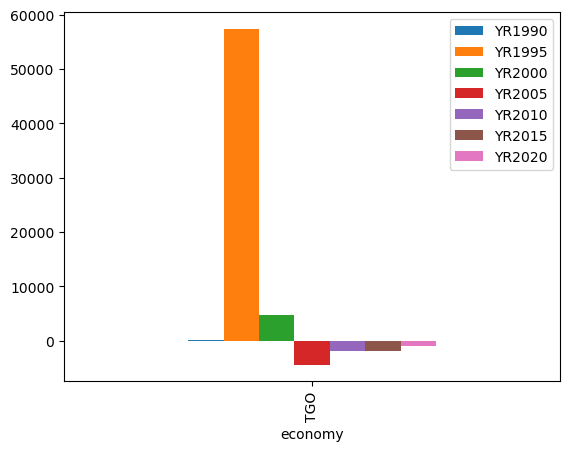

In [85]:
wb.data.DataFrame(['SM.POP.NETM'],
                     countries,
                      time=range(1990,2021,5)).plot.bar() 

<Axes: xlabel='economy'>

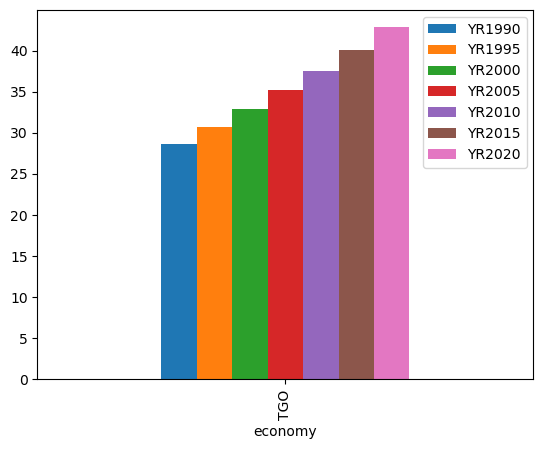

In [86]:
wb.data.DataFrame(['SP.URB.TOTL.IN.ZS'],
                     countries,
                      time=range(1990,2021,5)).plot.bar() 

<Axes: xlabel='economy'>

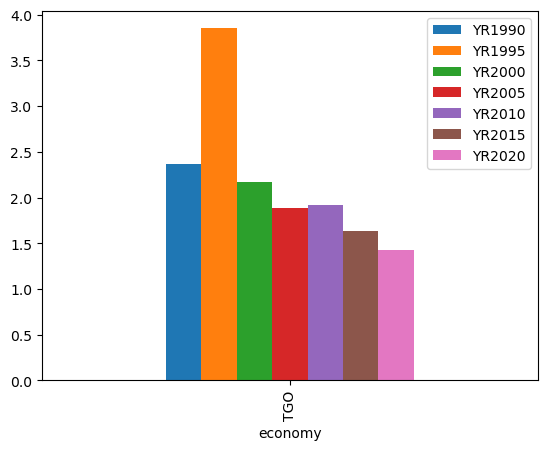

In [87]:
wb.data.DataFrame(['SP.RUR.TOTL.ZG'],
                     countries,
                      time=range(1990,2021,5)).plot.bar() 

<Axes: xlabel='economy'>

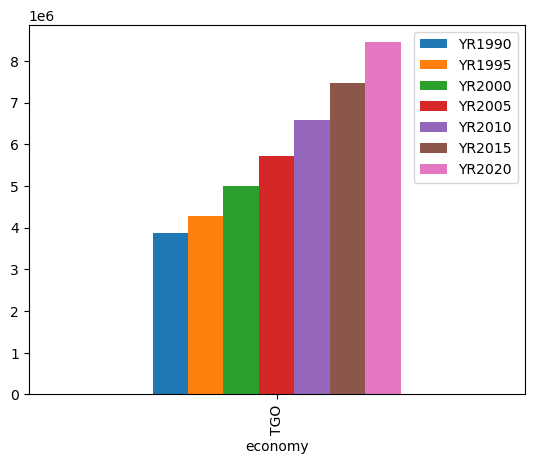

In [88]:
wb.data.DataFrame(['SP.POP.TOTL'],
                     countries,
                      time=range(1990,2021,5)).plot.bar() 

<Axes: xlabel='economy'>

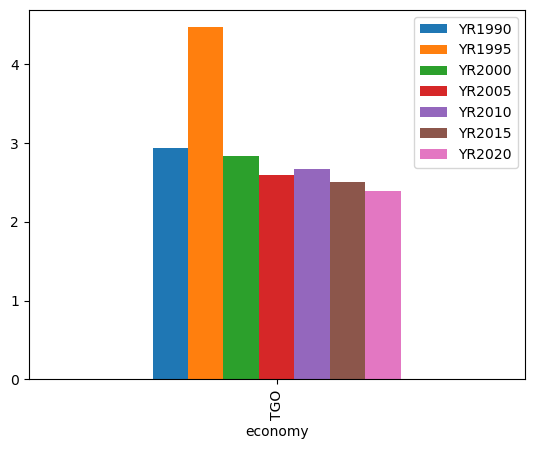

In [89]:
wb.data.DataFrame(['SP.POP.GROW'],
                     countries,
                      time=range(1990,2021,5)).plot.bar() 

<Axes: xlabel='economy'>

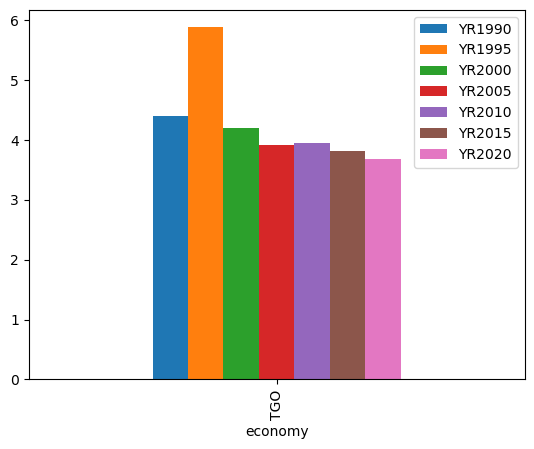

In [90]:
wb.data.DataFrame(['SP.URB.GROW'],
                     countries,
                      time=range(1990,2021,5)).plot.bar() 

In [91]:
list_values_Migration_nette = []

Migration_nette=wb.data.DataFrame('SM.POP.NETM', 
                    economy = countries,
                      
                    time = range(1990, 2021), numericTimeKeys = True,
                    labels = True).set_index('Country')

for (column_name, column_data) in Migration_nette.items():

    list_values_Migration_nette.append(column_data.values)
    
list_values_Migration_nette 

[array([59.]),
 array([-72.]),
 array([-132.]),
 array([-291022.]),
 array([88992.]),
 array([57406.]),
 array([40915.]),
 array([11899.]),
 array([12365.]),
 array([11122.]),
 array([4710.]),
 array([-1711.]),
 array([-5972.]),
 array([-2797.]),
 array([-1007.]),
 array([-4438.]),
 array([21722.]),
 array([4811.]),
 array([14304.]),
 array([-1997.]),
 array([-1972.]),
 array([-1980.]),
 array([-1992.]),
 array([-1985.]),
 array([-1985.]),
 array([-1985.]),
 array([-1988.]),
 array([-1997.]),
 array([-1997.]),
 array([-1997.]),
 array([-995.])]

In [92]:
list_values_Population_urbaine = []

Population_urbaine=wb.data.DataFrame('SP.URB.TOTL.IN.ZS', 
                    economy = countries,
                      
                    time = range(1990, 2021), numericTimeKeys = True,
                    labels = True).set_index('Country')

for (column_name, column_data) in Population_urbaine.items():

    list_values_Population_urbaine.append(column_data.values)
    
list_values_Population_urbaine 

[array([28.589]),
 array([29.005]),
 array([29.425]),
 array([29.848]),
 array([30.275]),
 array([30.705]),
 array([31.139]),
 array([31.576]),
 array([32.016]),
 array([32.46]),
 array([32.907]),
 array([33.356]),
 array([33.809]),
 array([34.265]),
 array([34.724]),
 array([35.185]),
 array([35.649]),
 array([36.116]),
 array([36.587]),
 array([37.058]),
 array([37.533]),
 array([38.032]),
 array([38.546]),
 array([39.061]),
 array([39.579]),
 array([40.1]),
 array([40.628]),
 array([41.162]),
 array([41.702]),
 array([42.248]),
 array([42.8])]

In [93]:
list_values_Croissance_pop_rurale = []

Croissance_pop_rurale=wb.data.DataFrame('SP.RUR.TOTL.ZG', 
                    economy = countries,
                      
                    time = range(1990, 2021), numericTimeKeys = True,
                    labels = True).set_index('Country')

for (column_name, column_data) in Croissance_pop_rurale.items():

    list_values_Croissance_pop_rurale.append(column_data.values)
    
list_values_Croissance_pop_rurale 

[array([2.36323436]),
 array([2.32124016]),
 array([2.27240904]),
 array([-1.28113426]),
 array([-0.26248351]),
 array([3.84818388]),
 array([3.184405]),
 array([2.6090616]),
 array([2.26784097]),
 array([2.25536189]),
 array([2.17323991]),
 array([2.0349909]),
 array([1.92886262]),
 array([1.91500934]),
 array([1.92486829]),
 array([1.88751629]),
 array([2.0893279]),
 array([2.17910247]),
 array([2.1117734]),
 array([2.04587807]),
 array([1.9137981]),
 array([1.8529216]),
 array([1.76991366]),
 array([1.71821239]),
 array([1.67733492]),
 array([1.63851733]),
 array([1.60078089]),
 array([1.56460835]),
 array([1.5169736]),
 array([1.47065504]),
 array([1.43080833])]

In [94]:
list_values_Population_total = []

Population_total=wb.data.DataFrame('NV.AGR.TOTL.KD.ZG', 
                    economy = countries,
                      
                    time = range(1990, 2021), numericTimeKeys = True,
                    labels = True).set_index('Country')

for (column_name, column_data) in Population_total.items():

    list_values_Population_total.append(column_data.values)
    
list_values_Population_total

[array([2.99176081]),
 array([-1.138791]),
 array([1.22344499]),
 array([5.9943751]),
 array([-0.06268331]),
 array([5.54488437]),
 array([16.36671595]),
 array([4.46317431]),
 array([-2.7610406]),
 array([5.48482078]),
 array([-4.73537901]),
 array([5.59065174]),
 array([0.31857666]),
 array([-1.63006923]),
 array([3.36749969]),
 array([10.04718816]),
 array([-5.25443527]),
 array([2.11891476]),
 array([-3.85245521]),
 array([12.55552983]),
 array([4.88581705]),
 array([-0.596307]),
 array([7.51395247]),
 array([-5.5512121]),
 array([15.46956253]),
 array([-0.65677966]),
 array([2.9217288]),
 array([6.80677815]),
 array([4.59520296]),
 array([5.55473315]),
 array([-0.91095447])]

In [102]:
list_values_Croissance_population_urbaine = []

Croissance_population_urbaine=wb.data.DataFrame('SP.URB.GROW', 
                    economy = countries,
                      
                    time = range(1990, 2021), numericTimeKeys = True,
                    labels = True).set_index('Country')

for (column_name, column_data) in Croissance_population_urbaine.items():

    list_values_Croissance_population_urbaine.append(column_data.values)
    
list_values_Croissance_population_urbaine 

[array([4.39499619]),
 array([4.35018551]),
 array([4.30338925]),
 array([0.74729082]),
 array([1.76851939]),
 array([5.87718499]),
 array([5.21626001]),
 array([4.63931397]),
 array([4.29681111]),
 array([4.28786806]),
 array([4.20491371]),
 array([4.06166814]),
 array([3.95986221]),
 array([3.94606335]),
 array([3.95621798]),
 array([3.915123]),
 array([4.11795495]),
 array([4.20889772]),
 array([4.14747834]),
 array([4.07055519]),
 array([3.94493604]),
 array([3.97571348]),
 array([3.94528801]),
 array([3.88696498]),
 array([3.84841374]),
 array([3.81232115]),
 array([3.79426862]),
 array([3.77386264]),
 array([3.7423654]),
 array([3.71241467]),
 array([3.68933124])]

In [106]:
list_values_Croissance_population = []

Croissance_population=wb.data.DataFrame('SP.POP.GROW', 
                    economy = countries,
                      
                    time = range(1990, 2021), numericTimeKeys = True,
                    labels = True).set_index('Country')

for (column_name, column_data) in Croissance_population.items():

    list_values_Croissance_population.append(column_data.values)
    
list_values_Croissance_population 

[array([2.93989289]),
 array([2.90550941]),
 array([2.86575396]),
 array([-0.67998607]),
 array([0.34806039]),
 array([4.46682056]),
 array([3.81268968]),
 array([3.2456926]),
 array([2.912967]),
 array([2.91059597]),
 array([2.83725675]),
 array([2.70645421]),
 array([2.61091785]),
 array([2.60631416]),
 array([2.62556726]),
 array([2.5962512]),
 array([2.80780206]),
 array([2.90743918]),
 array([2.85177808]),
 array([2.79141047]),
 array([2.67131694]),
 array([2.65496082]),
 array([2.60283805]),
 array([2.55975981]),
 array([2.53099874]),
 array([2.50454574]),
 array([2.48615624]),
 array([2.46807888]),
 array([2.43899403]),
 array([2.41162992]),
 array([2.39121902])]

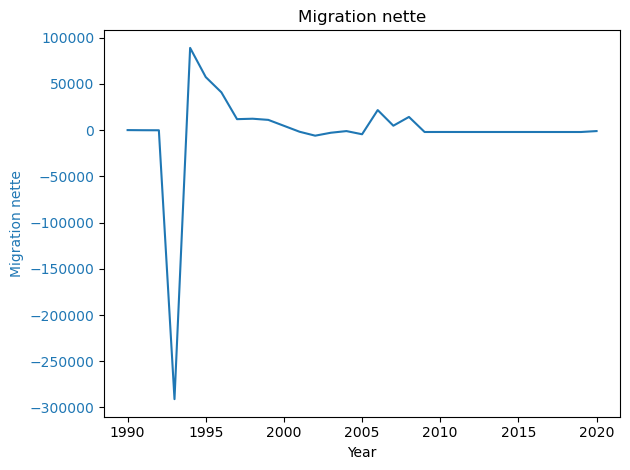

In [96]:
import matplotlib.pyplot as plt
import numpy as np

years=np.arange(1990, 2021)
fig, ax1=plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('Migration nette', color='tab:blue')
ax1.plot(years, list_values_Migration_nette, color='tab:blue', label='Migration nette')
ax1.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Migration nette')
fig.tight_layout()
plt.show()

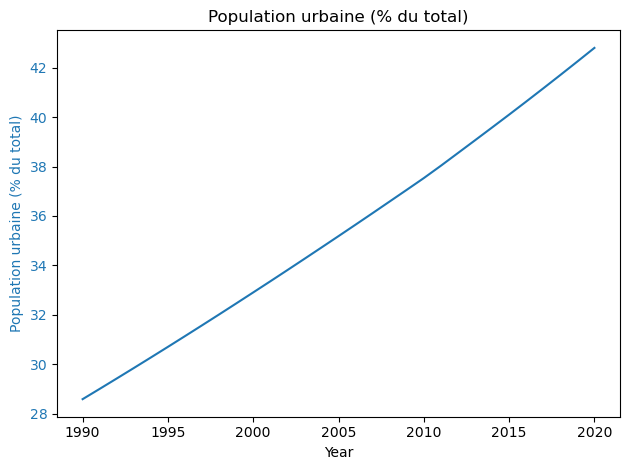

In [97]:
import matplotlib.pyplot as plt
import numpy as np

years=np.arange(1990, 2021)
fig, ax1=plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('Population urbaine (% du total)', color='tab:blue')
ax1.plot(years, list_values_Population_urbaine, color='tab:blue', label='Population urbaine (% du total)')
ax1.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Population urbaine (% du total)')
fig.tight_layout()
plt.show()

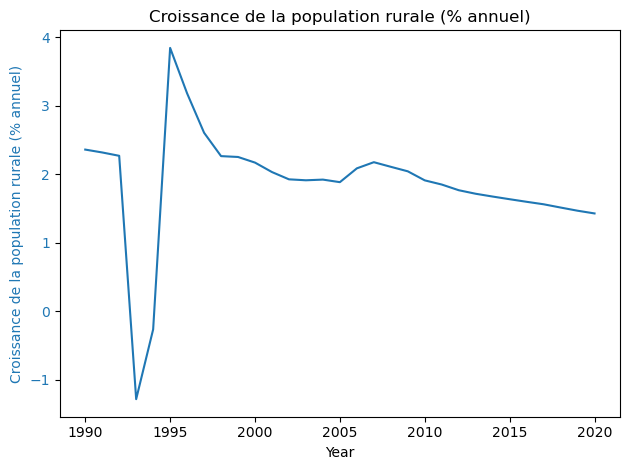

In [98]:
import matplotlib.pyplot as plt
import numpy as np

years=np.arange(1990, 2021)
fig, ax1=plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('Croissance de la population rurale (% annuel)', color='tab:blue')
ax1.plot(years, list_values_Croissance_pop_rurale, color='tab:blue', label='Croissance de la population rurale (% annuel)')
ax1.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Croissance de la population rurale (% annuel)')
fig.tight_layout()
plt.show()

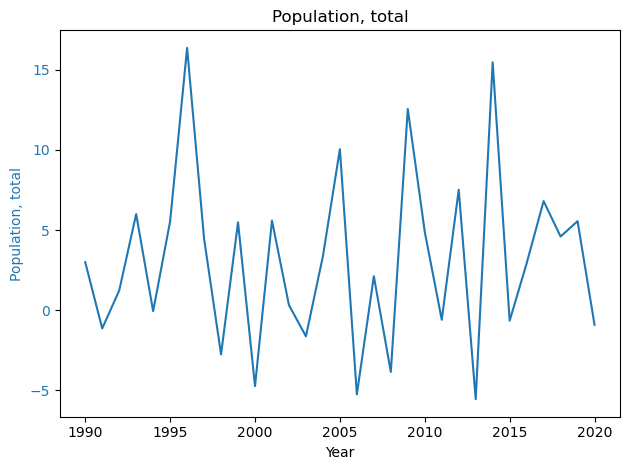

In [99]:
import matplotlib.pyplot as plt
import numpy as np

years=np.arange(1990, 2021)
fig, ax1=plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('Population, total', color='tab:blue')
ax1.plot(years, list_values_Population_total, color='tab:blue', label='Population, total')
ax1.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Population, total')
fig.tight_layout()
plt.show()

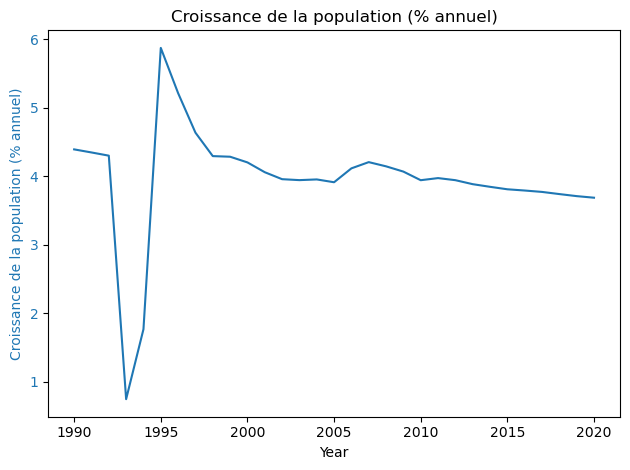

In [104]:
import matplotlib.pyplot as plt
import numpy as np

years=np.arange(1990, 2021)
fig, ax1=plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('Croissance de la population (% annuel)', color='tab:blue')
ax1.plot(years, list_values_Croissance_population_urbaine, color='tab:blue', label='Croissance de la population (% annuel)')
ax1.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Croissance de la population (% annuel)')
fig.tight_layout()
plt.show()

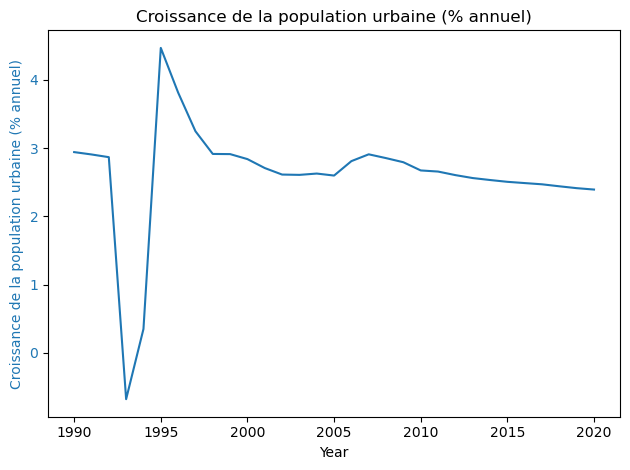

In [107]:
import matplotlib.pyplot as plt
import numpy as np

years=np.arange(1990, 2021)
fig, ax1=plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('Croissance de la population urbaine (% annuel)', color='tab:blue')
ax1.plot(years, list_values_Croissance_population, color='tab:blue', label='Croissance de la population urbaine (% annuel)')
ax1.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Croissance de la population urbaine (% annuel)')
fig.tight_layout()
plt.show()

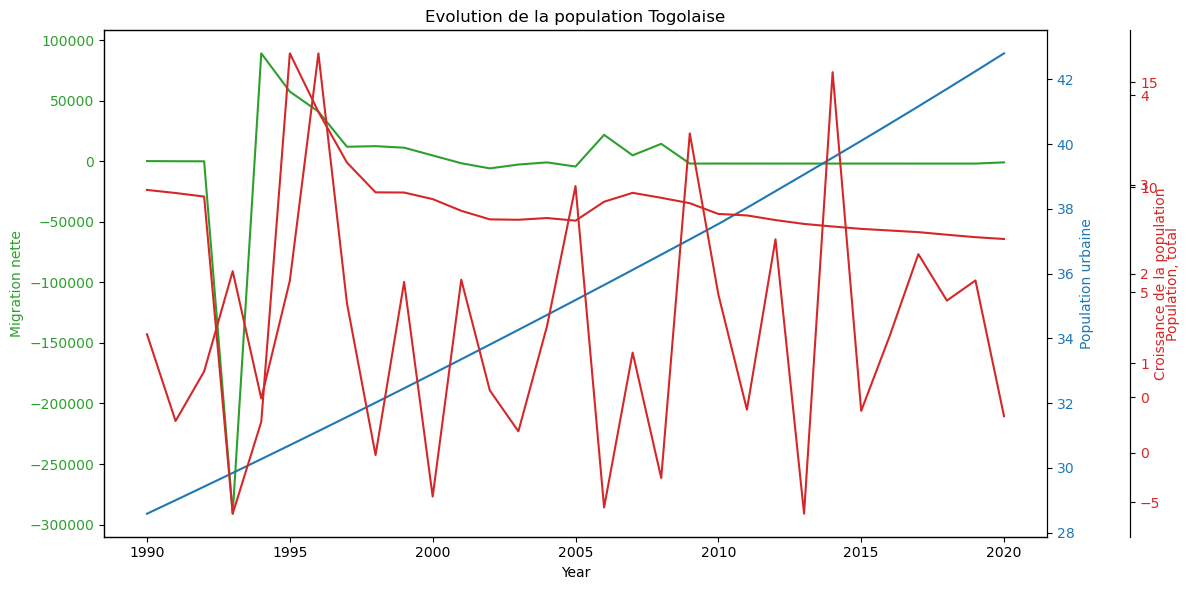

In [108]:
import matplotlib.pyplot as plt
import numpy as np

years=np.arange(1990, 2021)
fig, ax1=plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Year')
ax1.set_ylabel('Migration nette', color='tab:green')
ax1.plot(years, list_values_Migration_nette, color='tab:green', label='Migration nette')
ax1.tick_params(axis='y', labelcolor='tab:green')

ax2=ax1.twinx()
ax2.set_xlabel('Year')
ax2.set_ylabel('Population urbaine', color='tab:blue')
ax2.plot(years, list_values_Population_urbaine, color='tab:blue', label='Population urbaine')
ax2.tick_params(axis='y', labelcolor='tab:blue')

ax3=ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
ax3.set_ylabel('Population, total', color='tab:red')
ax3.plot(years, list_values_Population_total, color='tab:red', label='Population, total')
ax3.tick_params(axis='y', labelcolor='tab:red')

ax4=ax1.twinx()
ax4.spines['right'].set_position(('outward', 60))
ax4.set_ylabel('Croissance de la population', color='tab:red')
ax4.plot(years, list_values_Croissance_population, color='tab:red', label='Croissance de la population')
ax4.tick_params(axis='y', labelcolor='tab:red')

plt.title('Evolution de la population Togolaise')
fig.tight_layout()
plt.show()

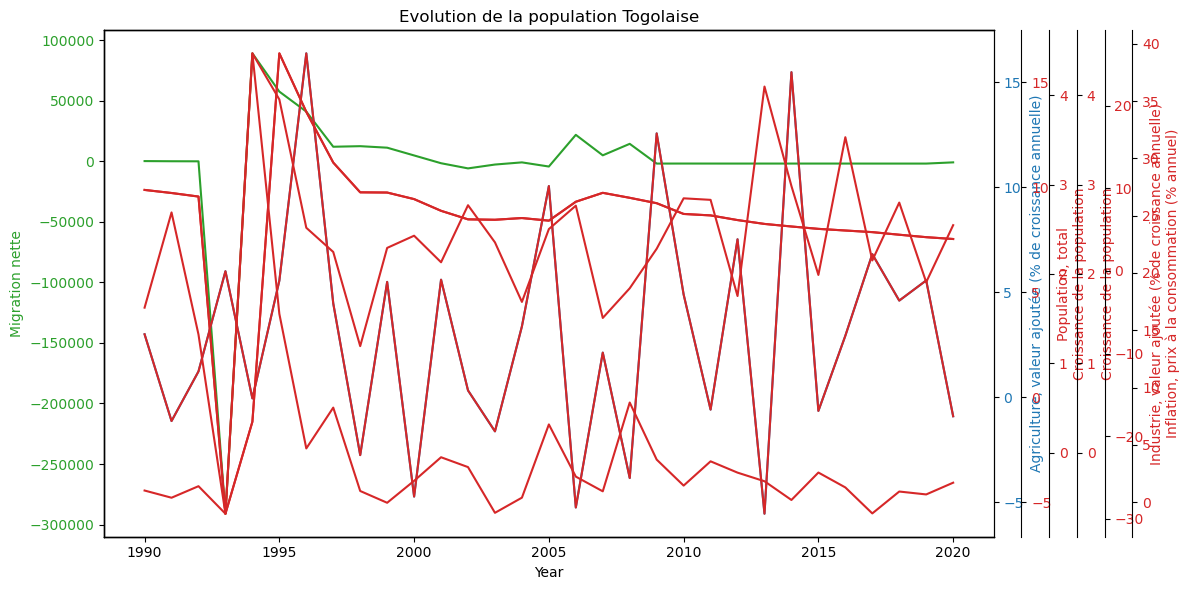

In [109]:
import matplotlib.pyplot as plt
import numpy as np

years=np.arange(1990, 2021)
fig, ax1=plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Year')
ax1.set_ylabel('Migration nette', color='tab:green')
ax1.plot(years, list_values_Migration_nette, color='tab:green', label='Migration nette')
ax1.tick_params(axis='y', labelcolor='tab:green')

ax2=ax1.twinx()
ax2.set_xlabel('Year')
ax2.set_ylabel('Agriculture, valeur ajoutée (% de croissance annuelle)', color='tab:blue')
ax2.plot(years, list_values_Agriculture, color='tab:blue', label='Agriculture, valeur ajoutée (% de croissance annuelle)')
ax2.tick_params(axis='y', labelcolor='tab:blue')

ax3=ax1.twinx()
ax3.spines['right'].set_position(('outward', 20))
ax3.set_ylabel('Population, total', color='tab:red')
ax3.plot(years, list_values_Population_total, color='tab:red', label='Population, total')
ax3.tick_params(axis='y', labelcolor='tab:red')

ax4=ax1.twinx()
ax4.spines['right'].set_position(('outward', 40))
ax4.set_ylabel('Croissance de la population', color='tab:red')
ax4.plot(years, list_values_Croissance_population, color='tab:red', label='Croissance de la population')
ax4.tick_params(axis='y', labelcolor='tab:red')

ax4=ax1.twinx()
ax4.spines['right'].set_position(('outward', 60))
ax4.set_ylabel('Croissance de la population', color='tab:red')
ax4.plot(years, list_values_Croissance_population, color='tab:red', label='Croissance de la population')
ax4.tick_params(axis='y', labelcolor='tab:red')

ax5=ax1.twinx()
ax5.spines['right'].set_position(('outward', 80))
ax5.set_ylabel('Industrie, valeur ajoutée (% de croissance annuelle)', color='tab:red')
ax5.plot(years, list_values_Industrie_croissance_annuelle, color='tab:red', label='Industrie, valeur ajoutée (% de croissance annuelle)')
ax5.tick_params(axis='y', labelcolor='tab:red')

ax6=ax1.twinx()
ax6.spines['right'].set_position(('outward', 100))
ax6.set_ylabel('Inflation, prix à la consommation (% annuel)', color='tab:red')
ax6.plot(years, list_values_Inflation_conso, color='tab:red', label='Inflation, prix à la consommation (% annuel)')
ax6.tick_params(axis='y', labelcolor='tab:red')

plt.title('Evolution de la population Togolaise')
fig.tight_layout()
plt.show()

In [91]:
#QUESTION 5 : Analyse Comparative avec d'Autres Pays

# Croissance du PIB par habitant (% annuel). NY.GDP.PCAP.KD.ZG
# Croissance du PIB (% annuel). NY.GDP.MKTP.KD.ZG
# Taux de croissance moyen annualisé du niveau de vie par habitant, population totale (%). SI.SPR.PCAP.ZG


#Dette du gouvernement central, total (% du PIB). GC.DOD.TOTL.GD.ZS

In [110]:
countries_compare = []

for country in wb.region.members('WLD'):
    if country in ('TGO', "BEN", "RWA", "FRA", 'CAN'):
        countries_compare.append(country)
countries_compare = set(countries_compare)
wb.economy.info(countries_compare)

id    value       region    incomeLevel
----  ----------  --------  -------------
BEN   Benin       SSF       LMC
CAN   Canada      NAC       HIC
FRA   France      ECS       HIC
RWA   Rwanda      SSF       LIC
TGO   Togo        SSF       LIC
      5 elements

In [111]:
wb.economy.DataFrame(countries_compare)

name  aggregate  longitude  latitude region adminregion lendingType  \
id                                                                           
BEN   Benin      False    2.63230   6.47790    SSF         SSA         IDX   
CAN  Canada      False  -75.69190  45.42150    NAC                     LNX   
FRA  France      False    2.35097  48.85660    ECS                     LNX   
RWA  Rwanda      False   30.05870  -1.95325    SSF         SSA         IDX   
TGO    Togo      False    1.22550   6.12280    SSF         SSA         IDX   

    incomeLevel capitalCity  
id                           
BEN         LMC  Porto-Novo  
CAN         HIC      Ottawa  
FRA         HIC       Paris  
RWA         LIC      Kigali  
TGO         LIC        Lome

In [112]:
wb.data.DataFrame(['NY.GDP.PCAP.KD.ZG', 'NY.GDP.MKTP.KD.ZG', 'SI.SPR.PCAP.ZG', 'GC.DOD.TOTL.GD.ZS'], 
                    economy = countries_compare,
                    #mrnev = 1, # Most recent non-empty most values (time period varies)
                    timeColumns = True, # Show the time dimension for each series/economy
                    labels = True
                    )

Country  \
economy series                      
TGO     NY.GDP.PCAP.KD.ZG    Togo   
BEN     NY.GDP.PCAP.KD.ZG   Benin   
FRA     NY.GDP.PCAP.KD.ZG  France   
CAN     NY.GDP.PCAP.KD.ZG  Canada   
RWA     NY.GDP.PCAP.KD.ZG  Rwanda   
TGO     NY.GDP.MKTP.KD.ZG    Togo   
BEN     NY.GDP.MKTP.KD.ZG   Benin   
FRA     NY.GDP.MKTP.KD.ZG  France   
CAN     NY.GDP.MKTP.KD.ZG  Canada   
RWA     NY.GDP.MKTP.KD.ZG  Rwanda   
TGO     SI.SPR.PCAP.ZG       Togo   
BEN     SI.SPR.PCAP.ZG      Benin   
FRA     SI.SPR.PCAP.ZG     France   
CAN     SI.SPR.PCAP.ZG     Canada   
RWA     SI.SPR.PCAP.ZG     Rwanda   
TGO     GC.DOD.TOTL.GD.ZS    Togo   
BEN     GC.DOD.TOTL.GD.ZS   Benin   
FRA     GC.DOD.TOTL.GD.ZS  France   
CAN     GC.DOD.TOTL.GD.ZS  Canada   
RWA     GC.DOD.TOTL.GD.ZS  Rwanda   

                                                                      Series  \
economy series                                                                 
TGO     NY.GDP.PCAP.KD.ZG                   GDP per capita growth (annual %)   
BEN     NY.GDP.PCAP.KD.ZG                   GDP per capita growth (annual %)   
FRA     NY.GDP.PCAP.KD.ZG                   GDP per capita growth (annual %)   
CAN     NY.GDP.PCAP.KD.ZG                   GDP per capita growth (annual %)   
RWA     NY.GDP.PCAP.KD.ZG                   GDP per capita growth (annual %)   
TGO     NY.GDP.MKTP.KD.ZG                              GDP growth (annual %)   
BEN     NY.GDP.MKTP.KD.ZG                              GDP growth (annual %)   
FRA     NY.GDP.MKTP.KD.ZG                              GDP growth (annual %)   
CAN     NY.GDP.MKTP.KD.ZG                              GDP growth (annual %)   
RWA     NY.GDP.MKTP.KD.ZG                              GDP growth (annual %)   
TGO     SI.SPR.PCAP.ZG     Annualized average growth rate in per capita r...   
BEN     SI.SPR.PCAP.ZG     Annualized average growth rate in per capita r...   
FRA     SI.SPR.PCAP.ZG     Annualized average growth rate in per capita r...   
CAN     SI.SPR.PCAP.ZG     Annualized average growth rate in per capita r...   
RWA     SI.SPR.PCAP.ZG     Annualized average growth rate in per capita r...   
TGO     GC.DOD.TOTL.GD.ZS          Central government debt, total (% of GDP)   
BEN     GC.DOD.TOTL.GD.ZS          Central government debt, total (% of GDP)   
FRA     GC.DOD.TOTL.GD.ZS          Central government debt, total (% of GDP)   
CAN     GC.DOD.TOTL.GD.ZS          Central government debt, total (% of GDP)   
RWA     GC.DOD.TOTL.GD.ZS          Central government debt, total (% of GDP)   

                           YR1960     YR1961     YR1962     YR1963     YR1964  \
economy series                                                                  
TGO     NY.GDP.PCAP.KD.ZG     NaN  10.337165   2.068068   3.194618  11.967929   
BEN     NY.GDP.PCAP.KD.ZG     NaN   1.567327  -4.993677   2.952293   4.762979   
FRA     NY.GDP.PCAP.KD.ZG     NaN   3.841055   5.682369   5.109072   5.461454   
CAN     NY.GDP.PCAP.KD.ZG     NaN   1.121346   5.445858   3.405213   4.650755   
RWA     NY.GDP.PCAP.KD.ZG     NaN  -6.825967   8.642566 -11.775520 -14.404949   
TGO     NY.GDP.MKTP.KD.ZG     NaN  12.169317   3.773653   4.999694  14.286011   
BEN     NY.GDP.MKTP.KD.ZG     NaN   3.141280  -3.426410   4.730028   6.650759   
FRA     NY.GDP.MKTP.KD.ZG     NaN   4.980112   6.843470   6.233680   6.652100   
CAN     NY.GDP.MKTP.KD.ZG     NaN   3.163292   7.425385   5.349546   6.642894   
RWA     NY.GDP.MKTP.KD.ZG     NaN  -4.297526  11.333798  -9.820444 -12.464993   
TGO     SI.SPR.PCAP.ZG        NaN        NaN        NaN        NaN        NaN   
BEN     SI.SPR.PCAP.ZG        NaN        NaN        NaN        NaN        NaN   
FRA     SI.SPR.PCAP.ZG        NaN        NaN        NaN        NaN        NaN   
CAN     SI.SPR.PCAP.ZG        NaN        NaN        NaN        NaN        NaN   
RWA     SI.SPR.PCAP.ZG        NaN        NaN        NaN        NaN        NaN   
TGO     GC.DOD.TOTL.GD.ZS     NaN        NaN        NaN        NaN       

In [115]:
Croissance_PIB_HA =wb.data.DataFrame('NY.GDP.PCAP.KD.ZG', 
                    economy = countries_compare, 
                    time = range(2000, 2021), numericTimeKeys = True,
                    labels = True).set_index('Country')
Croissance_PIB_HA

2000      2001       2002      2003      2004      2005  \
Country                                                                
Togo    -3.558947 -1.868706   1.150878  3.974642 -3.544703 -7.109548   
Benin    2.689647  2.207365   1.548959  0.372025  1.316512 -1.467814   
France   3.212385  1.242527   0.401189  0.109403  2.076625  0.903680   
Canada   4.202683  0.690161   1.903852  0.888030  2.129631  2.234059   
Rwanda   7.029241  6.981408  11.186203 -0.131839  4.711798  6.536954   

             2006      2007      2008      2009  ...      2011      2012  \
Country                                          ...                       
Togo    -0.191993 -4.007026  1.110684  2.550880  ...  3.050655  3.571507   
Benin    0.811410  2.982053  1.849625 -0.648437  ... -0.007428  1.800064   
France   1.741085  1.795236 -0.302484 -3.370397  ...  1.700610 -0.171161   
Canada   1.602575  1.085367 -0.083592 -4.028003  ...  2.141536  0.662001   
Rwanda   6.354831  4.772671  8.219969  3.479418  ...  5.223938  6.001706   

             2013      2014      2015      2016      2017      2018      2019  \
Country                                                                         
Togo     3.149795  2.993215  2.859340  1.655893  1.472334  2.270153  2.422750   
Benin    4.127606  3.290505 -1.181685  0.335852  2.603557  3.624263  3.824507   
France   0.058150  0.484564  0.754024  0.829057  1.994998  1.500539  1.495899   
Canada   1.253614  1.841026 -0.089286 -0.135843  1.811279  1.335564  0.435426   
Rwanda   2.257667  3.672777  6.290306  3.413261  1.384346  5.925179  6.876304   

             2020  
Country            
Togo    -0.251661  
Benin    0.951938  
France  -7.791009  
Canada  -6.088212  
Rwanda  -5.664768  

[5 rows x 21 columns]

In [126]:
list_values_Croissance_PIB_HA = []
# Croissance du PIB par habitant
Croissance_PIB_HA=wb.data.DataFrame('NY.GDP.PCAP.KD.ZG', 
                    economy = countries_compare,
                      
                    time = range(1990, 2021), numericTimeKeys = True,
                    labels = True).set_index('Country')

for (column_name, column_data) in Croissance_PIB_HA.items():

    list_values_Croissance_PIB_HA.append(column_data.values)
    
list_values_Croissance_PIB_HA 

[array([-3.13369561,  5.71244559,  2.43024697, -1.33414395, -4.77249399]),
 array([-3.54362783,  1.08257118,  0.16314633, -3.2953917 , -4.67252926]),
 array([-6.69330989, -0.14985962,  1.09459803, -0.28703143,  3.50109959]),
 array([-14.51652358,   1.22888349,  -1.05943733,   1.53886102,
        -10.98621085]),
 array([ 14.58290178,  -1.72072453,   1.97639228,   3.3562268 ,
        -41.58686137]),
 array([ 3.13455792,  3.88594239,  1.73610124,  1.6368094 , 60.09054133]),
 array([ 4.76473422,  1.67829883,  1.05172456,  0.56246786, -4.52353448]),
 array([10.7246385 ,  2.70244772,  1.97211924,  3.24884931, -0.27574313]),
 array([-5.10479738,  0.84800005,  3.20515306,  3.03747599,  5.44885398]),
 array([-0.45808734,  2.16959373,  2.88869862,  4.31156937,  3.11494852]),
 array([-3.55894727,  2.68964738,  3.21238485,  4.20268257,  7.02924095]),
 array([-1.86870629,  2.20736492,  1.24252729,  0.69016125,  6.981408  ]),
 array([ 1.15087751,  1.54895925,  0.40118913,  1.903852  , 11.18620306]),

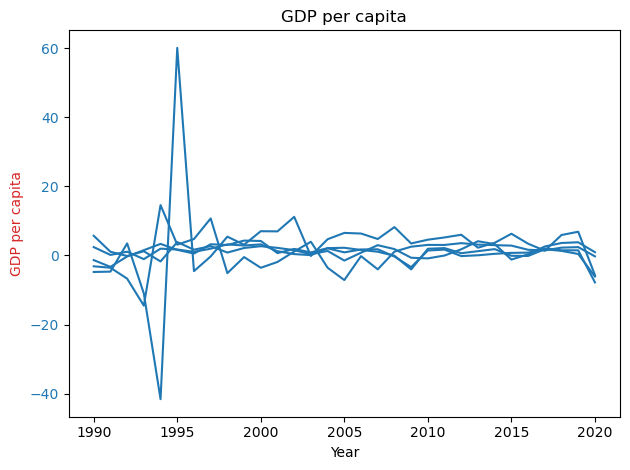

In [127]:
import matplotlib.pyplot as plt
import numpy as np

years=np.arange(1990, 2021)
fig, ax1=plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('GDP per capita', color='tab:red')
ax1.plot(years, list_values_Croissance_PIB_HA, color='tab:blue', label='GDP per cap')
ax1.tick_params(axis='y', labelcolor='tab:blue')

plt.title('GDP per capita')
fig.tight_layout()
plt.show()

In [ ]:
# Croissance du PIB (% annuel). NY.GDP.MKTP.KD.ZG

In [ ]:
Croissance_PIB_annuel =wb.data.DataFrame('NY.GDP.MKTP.KD.ZG', 
                    economy = countries_compare, 
                    time = range(2000, 2021), numericTimeKeys = True,
                    labels = True).set_index('Country')
Croissance_PIB_annuel

In [ ]:
list_values_Croissance_PIB_annuel = []
# Croissance du PIB par habitant
Croissance_PIB_annuel=wb.data.DataFrame('NY.GDP.PCAP.KD.ZG', 
                    economy = countries_compare,
                      
                    time = range(1990, 2021), numericTimeKeys = True,
                    labels = True).set_index('Country')

for (column_name, column_data) in Croissance_PIB_annuel.items():

    list_values_Croissance_PIB_annuel.append(column_data.values)
    
list_values_Croissance_PIB_annuel 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

years=np.arange(1990, 2021)
fig, ax1=plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('GDP per capita', color='tab:red')
ax1.plot(years, list_values_Croissance_PIB_annuel, color='tab:blue', label='GDP per cap')
ax1.tick_params(axis='y', labelcolor='tab:blue')

plt.title('GDP per capita')
fig.tight_layout()
plt.show()

In [ ]:
# Taux de croissance moyen annualisé du niveau de vie par habitant, population totale (%). SI.SPR.PCAP.ZG

In [ ]:
Croissance_annuel_pop_tot =wb.data.DataFrame('SI.SPR.PCAP.ZG', 
                    economy = countries_compare, 
                    time = range(2000, 2021), numericTimeKeys = True,
                    labels = True).set_index('Country')
Croissance_annuel_pop_tot

In [ ]:
list_values_Croissance_annuel_pop_tot = []
# Croissance du PIB par habitant
Croissance_annuel_pop_tot=wb.data.DataFrame('NY.GDP.PCAP.KD.ZG', 
                    economy = countries_compare,
                      
                    time = range(1990, 2021), numericTimeKeys = True,
                    labels = True).set_index('Country')

for (column_name, column_data) in Croissance_annuel_pop_tot.items():

    list_values_Croissance_annuel_pop_tot.append(column_data.values)
    
list_values_Croissance_annuel_pop_tot 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

years=np.arange(1990, 2021)
fig, ax1=plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('GDP per capita', color='tab:red')
ax1.plot(years, list_values_Croissance_annuel_pop_tot, color='tab:blue', label='GDP per cap')
ax1.tick_params(axis='y', labelcolor='tab:blue')

plt.title('GDP per capita')
fig.tight_layout()
plt.show()

In [ ]:
#Dette du gouvernement central, total (% du PIB). GC.DOD.TOTL.GD.ZS

In [ ]:
Dette_gouv_central =wb.data.DataFrame('GC.DOD.TOTL.GD.ZS', 
                    economy = countries_compare, 
                    time = range(2000, 2021), numericTimeKeys = True,
                    labels = True).set_index('Country')
Dette_gouv_central

In [ ]:
list_values_Dette_gouv_central = []
# Croissance du PIB par habitant
Dette_gouv_central=wb.data.DataFrame('NY.GDP.PCAP.KD.ZG', 
                    economy = countries_compare,
                      
                    time = range(1990, 2021), numericTimeKeys = True,
                    labels = True).set_index('Country')

for (column_name, column_data) in Dette_gouv_central.items():

    Dette_gouv_central.append(column_data.values)
    
Dette_gouv_central

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

years=np.arange(1990, 2021)
fig, ax1=plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('GDP per capita', color='tab:red')
ax1.plot(years, Dette_gouv_central, color='tab:blue', label='GDP per cap')
ax1.tick_params(axis='y', labelcolor='tab:blue')

plt.title('GDP per capita')
fig.tight_layout()
plt.show()

#### 